# MACHINE, DATA AND LEARNING: ASSIGNMENT 1: QUESTION 2

**TEAM NUMBER: 86** 

**TEAM MEMBERS:**
Tathagata Raha (2018114017)
Arathy Rose Tony(2018101042)

**TASK**:  
- You have been provided with a training data and a testing data. You need to fit the given data to polynomials of degree 1 to 9(both inclusive). 
- Specifically, you have been given 20 subsets of training data containing 400 samples each. For each polynomial, create 20 models trained on the 20 different subsets and find the variance of the predictions on the testing data. Also, find the bias of your trained models on the testing data. Finally plot the bias-variance trade-Off graph. 
- Write your observations in the report with respect to underfitting, overfitting and also comment on the type of data just by looking at the bias-variance plot.

# Header files included

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy
import random
import pickle
import pandas
import matplotlib.pyplot as plt

# Some global variables that can be used to check specific outputs

In [2]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the graphs

# STEP 1: LOADING THE DATASET AND VISUALISING IT

## LOAD THE DATASET

Here we load the data_set from multiple files stored in the same directory as the current notebook.

### Get x train dataset

In [3]:
f = open('X_train.pkl', 'rb')
X_train_data_sets = pickle.load(f)
f.close()

### Get y train dataset

In [4]:
f = open('Y_train.pkl', 'rb')
Y_train_data_sets = pickle.load(f)
f.close()

### Get x test dataset

In [5]:
f = open('X_test.pkl', 'rb')
xTest = pickle.load(f)
f.close()

### Get y test dataset

In [6]:
f = open('Fx_test.pkl', 'rb')
yTest = pickle.load(f)
f.close()

## Set all the sizes of the datasets

In [7]:
number_of_data_sets = len(X_train_data_sets)
train_size = len(X_train_data_sets[0])
test_size = len(xTest)

In [39]:
if(debug):
    print(train_size,test_size,number_of_data_sets)

400 80 20


## Get the list of all the x and y coordinates of the training dataset

In [8]:
x = []
y = []
for i in range(number_of_data_sets):
    x.append(list(X_train_data_sets[i]))
    y.append(list(Y_train_data_sets[i]))

In [40]:
if(debug):
    print("X: ",x)
    print("Y: ",y)

X:  [[ 46.30665334]
 [ 11.60395221]
 [ -2.90249351]
 [ -4.81859731]
 [-11.42817525]
 [-42.0032821 ]
 [ 14.98119491]
 [ 16.08412858]
 [ 29.31732605]
 [ 32.06594859]
 [ 46.12505643]
 [ -5.95227701]
 [ 34.36523711]
 [ 48.23164137]
 [-22.71296655]
 [ 45.75953454]
 [ -7.63974103]
 [-24.90042047]
 [ 32.44557878]
 [ 39.26650752]
 [  4.31122864]
 [ 28.6860519 ]
 [ 19.22478082]
 [-18.63053634]
 [-30.77612322]
 [ -6.36470836]
 [ 46.89875509]
 [-45.58179215]
 [ 13.67934311]
 [ 46.47588877]
 [-48.35175178]
 [-34.07987602]
 [ 35.33884527]
 [  2.80250636]
 [-21.89142547]
 [  9.92622721]
 [ -3.91167157]
 [-19.23183196]
 [-13.60078235]
 [ 11.98414713]
 [-22.09613436]
 [-22.77148537]
 [-12.31385934]
 [-49.48482358]
 [-47.74887317]
 [ 13.6828056 ]
 [-16.90938567]
 [ -3.62306667]
 [ -0.46728241]
 [ 40.09024357]
 [-24.28090024]
 [-32.48859673]
 [ 26.27763472]
 [ 24.56477352]
 [ -3.24250841]
 [  2.50296162]
 [-39.13662243]
 [ 31.5056391 ]
 [ 43.34179017]
 [ 14.59595868]
 [ 18.957623  ]
 [ 16.24167694]
 [ 3

## Graph the given dataset

Here we plot the given training dataset, just to get the feel of the dataset provided.

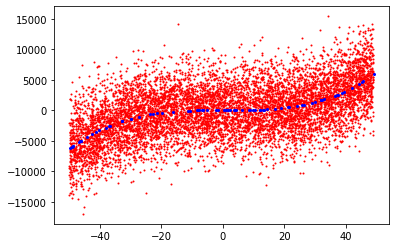

In [9]:
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=2)
plt.plot(xTest, yTest, 'b.', markersize=4)
plt.show()

From the graph, it is obvious that the given dataset is really noisy in nature. (Blue line denotes the test dataset while red line denotes the training dataset)

## Graphing Each Of The Training Datasets

Here we graph each of the training datasets separately. (to check if the datasets are sampled properly)

Training set  0


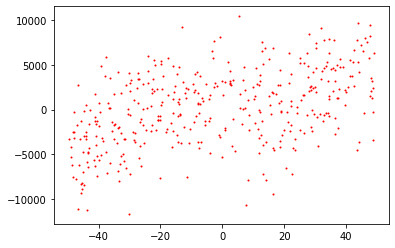

Training set  1


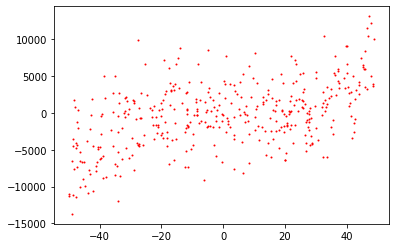

Training set  2


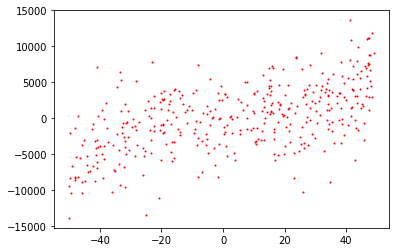

Training set  3


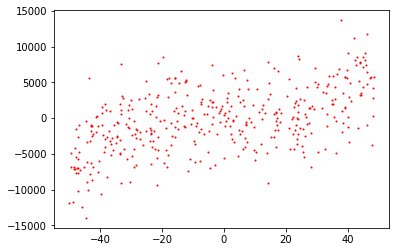

Training set  4


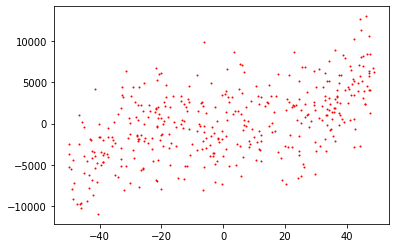

Training set  5


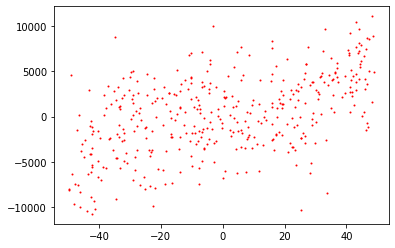

Training set  6


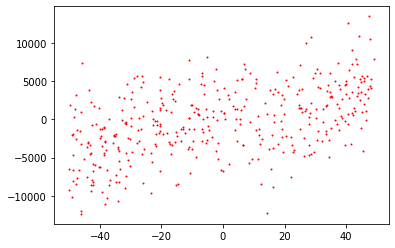

Training set  7


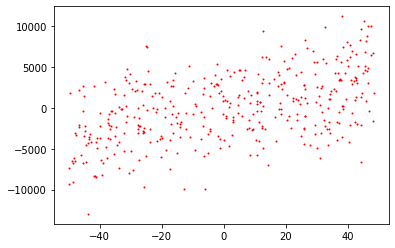

Training set  8


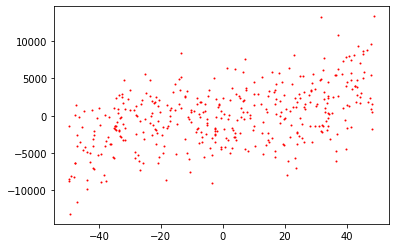

Training set  9


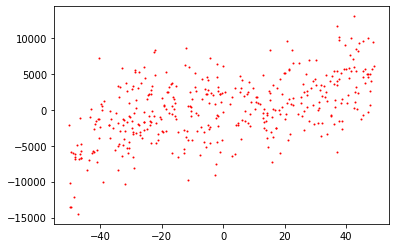

Training set  10


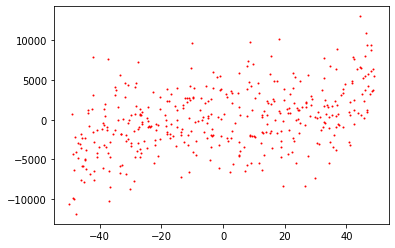

Training set  11


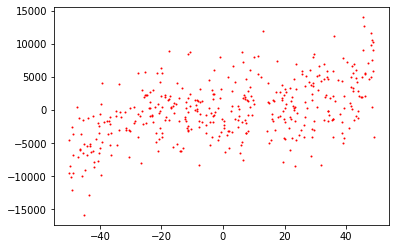

Training set  12


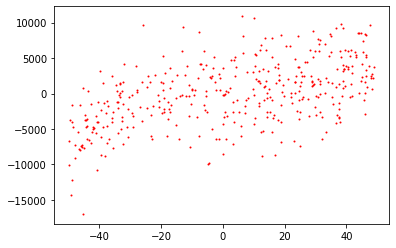

Training set  13


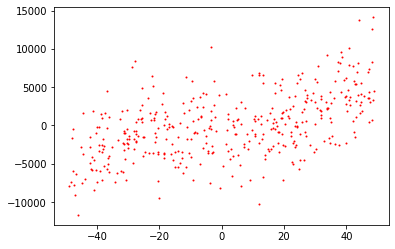

Training set  14


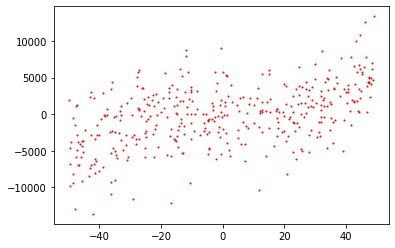

Training set  15


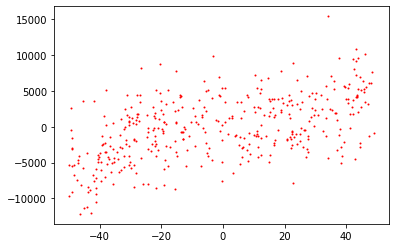

Training set  16


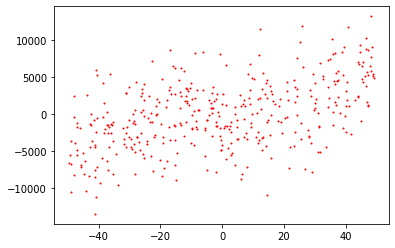

Training set  17


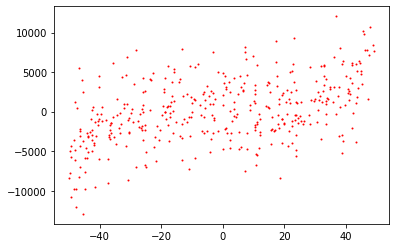

Training set  18


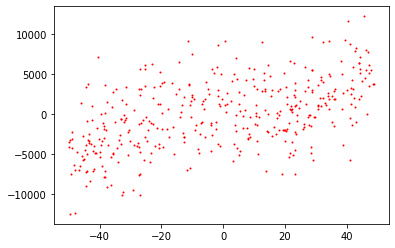

Training set  19


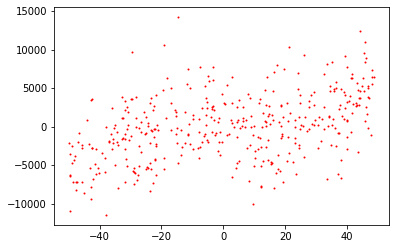

In [42]:
if(debug==1):
    for i in range(20):
        print("Training set ",i)
        fig = plt.figure()
        plt.plot(X_train_data_sets[i], Y_train_data_sets[i], 'r.', markersize=2)
        plt.show()

# STEP 2: TRAINING A MODEL

## Function just to store what exactly to be done to train a polynomial regression model of a given degree and given training dataset number

The following function returns a polynomial regression model for the given degree. I use this to find the lines required to make a model, of a given degree

In [12]:
def create_polynomial_regression_model(degree,i):
    i = 0
    # prepare the matrix of the powers of x
    poly_features = PolynomialFeatures(degree=degree)
    # transpose the x row matrix into a column matrix
    x = X_train_data_sets[i][:, numpy.newaxis]
    # get a matrix containing the higher powers of X in the format: [1 X X^2 X^3 ...]
    X_train_poly = poly_features.fit_transform(x)
    poly_model = LinearRegression()
    # fit the transformed features to Linear Regression
    poly_model.fit(X_train_poly, Y_train_data_sets[0])
    y_test_predict = poly_model.predict(
        poly_features.fit_transform(xTest))    # predicting on test data-set
    return poly_model

## Plotting A Graph Of The Trained Polynomial Regression Model

Here, we take each of the training datasets, and plot the training dataset points and the values predicted by the model on the test dataset points, to visualise the provided data.
For each training set, 9 graphs are plotted, each corresponding to the model of each degree (from 0 to 9)

TRAINING SET  0


<Figure size 432x288 with 0 Axes>

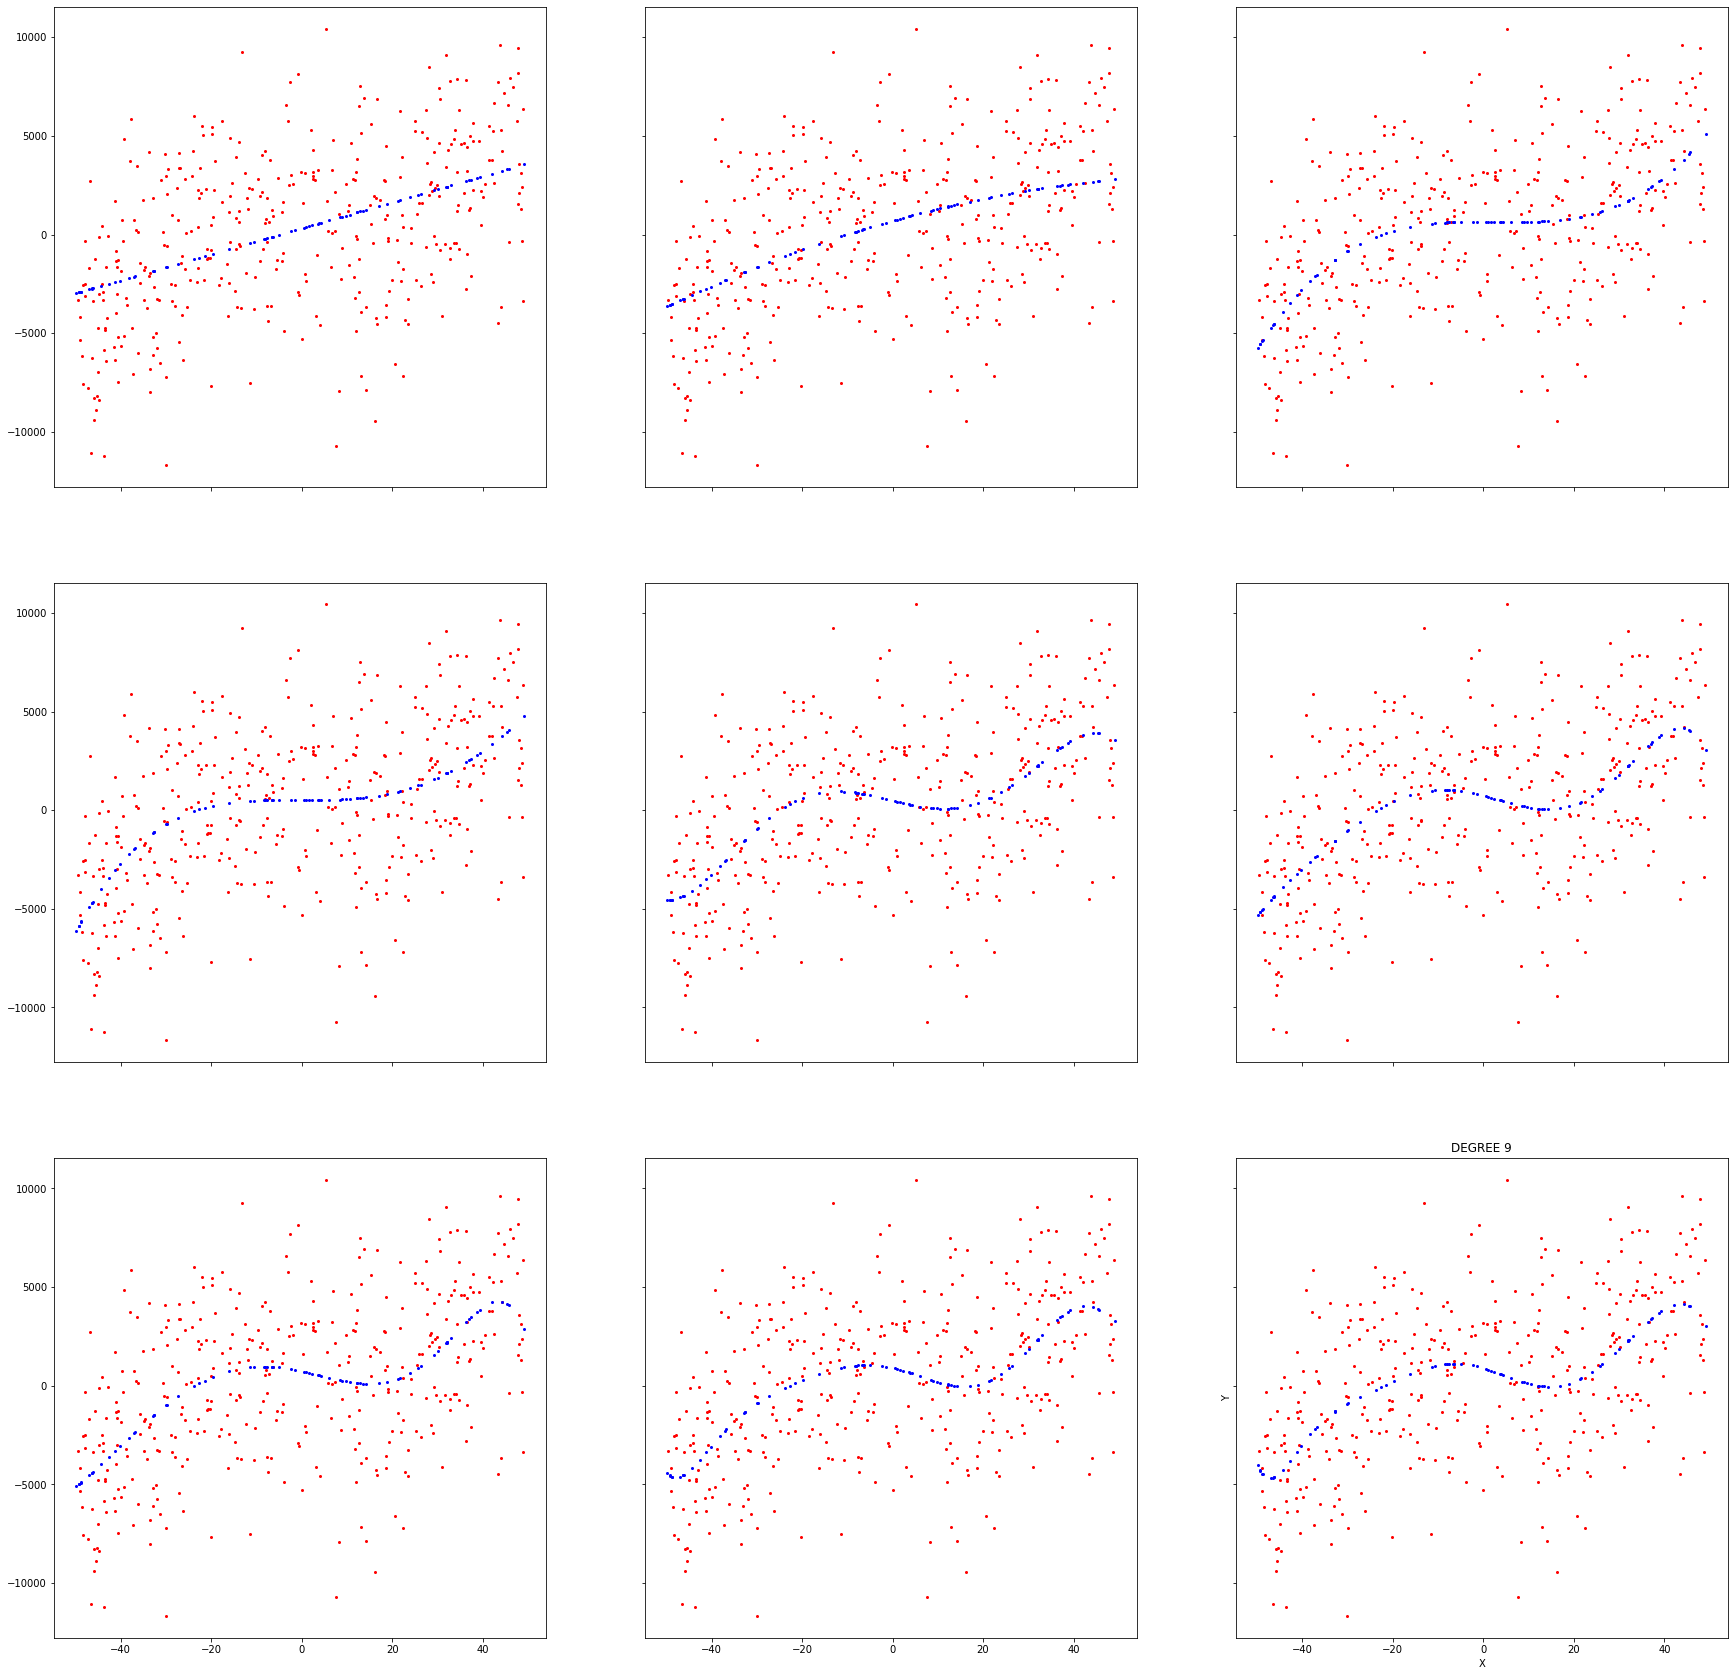

TRAINING SET  1


<Figure size 432x288 with 0 Axes>

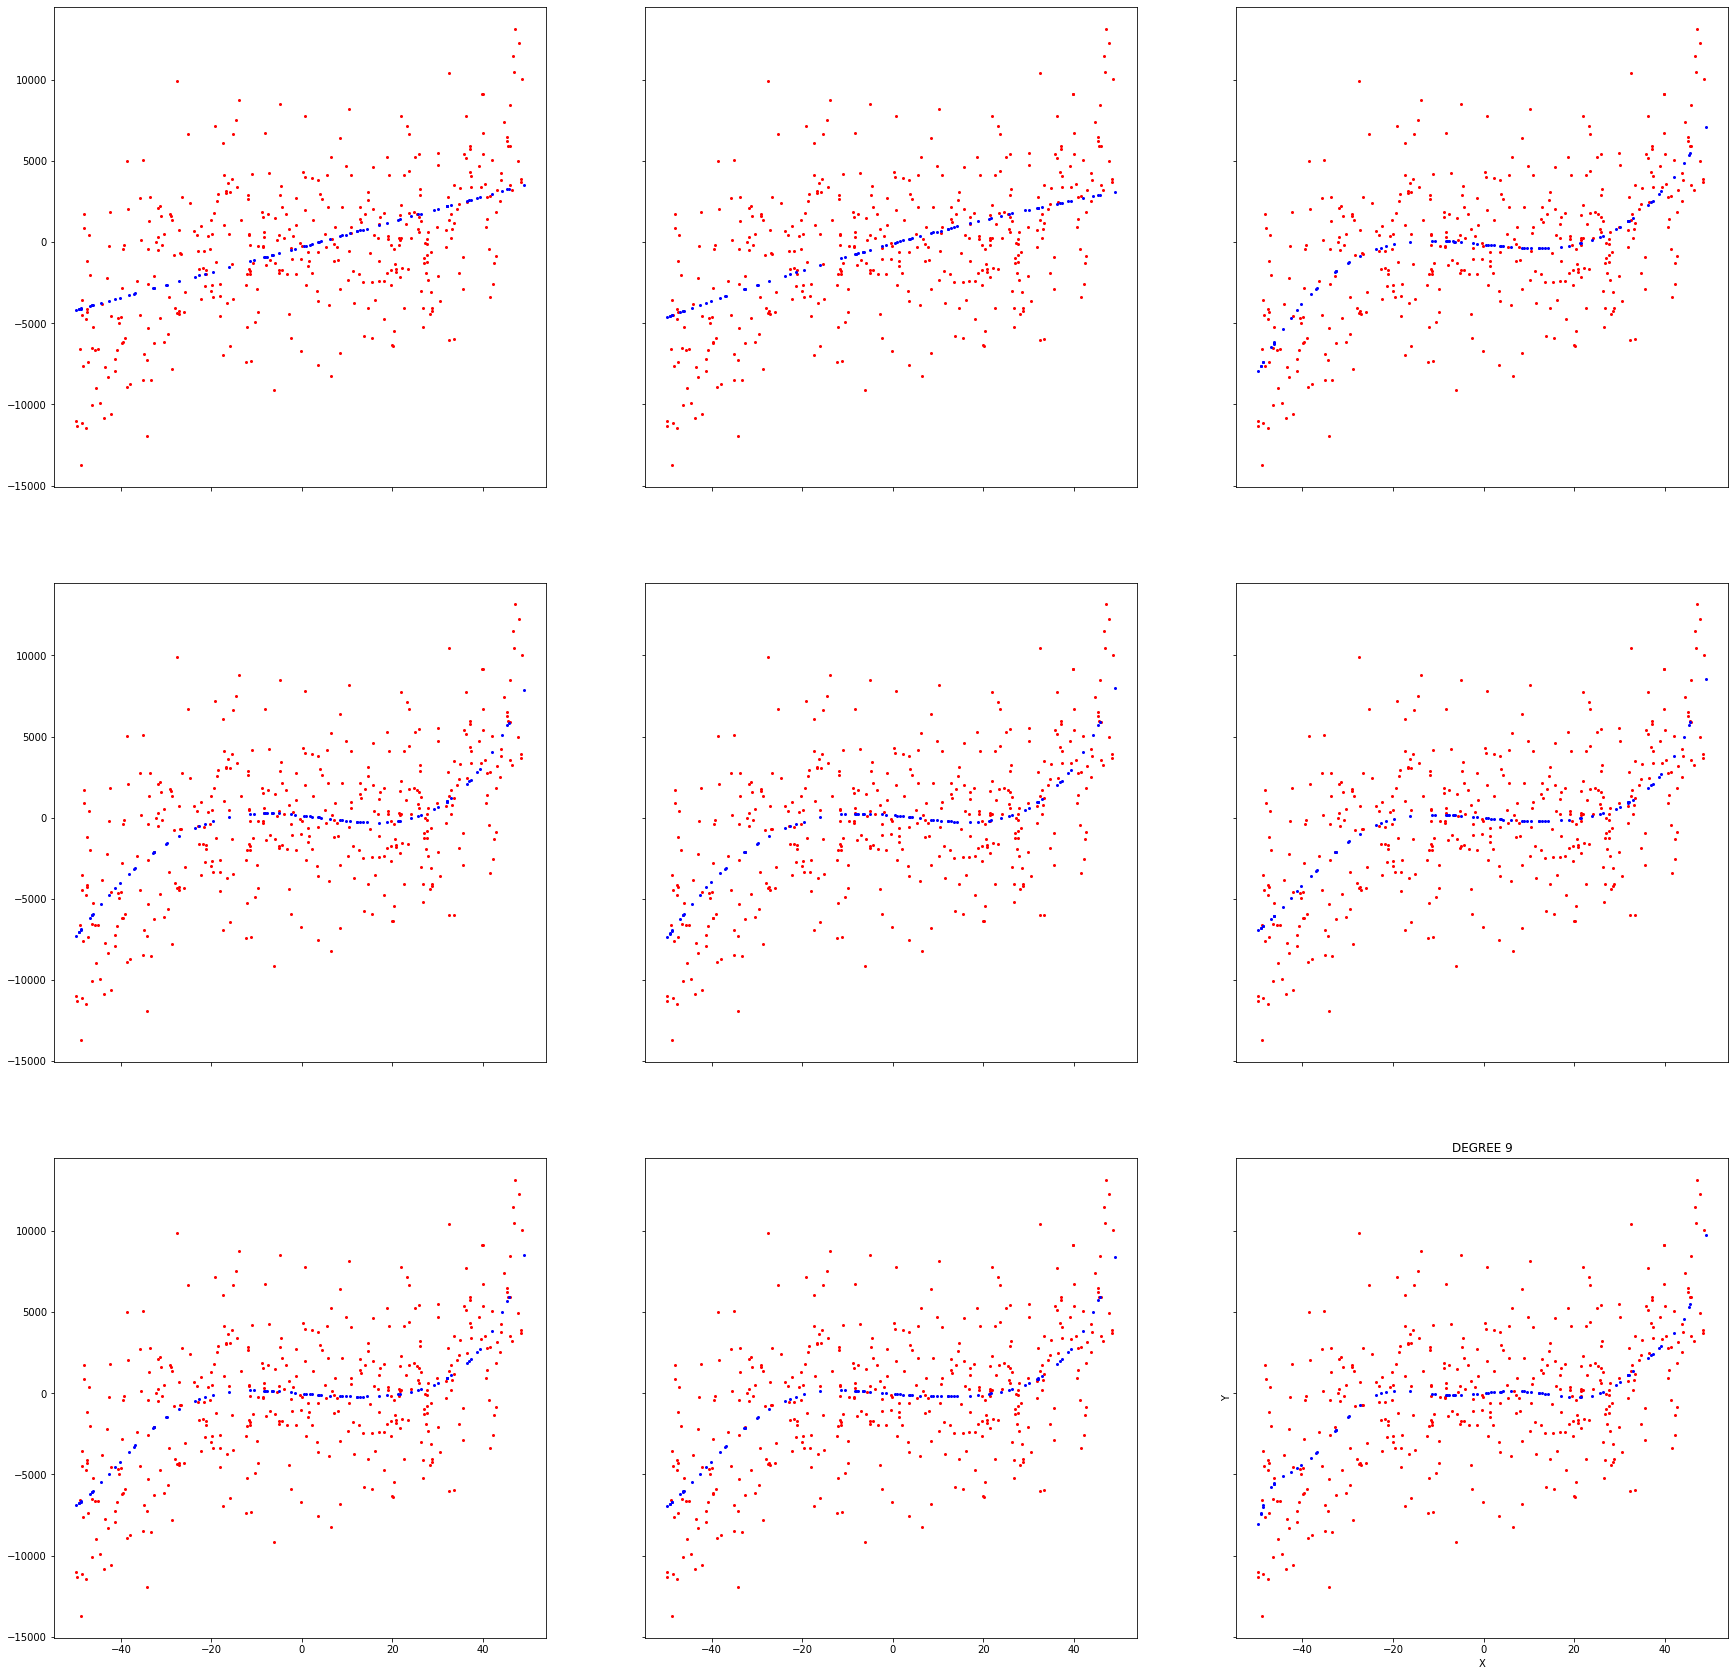

TRAINING SET  2


<Figure size 432x288 with 0 Axes>

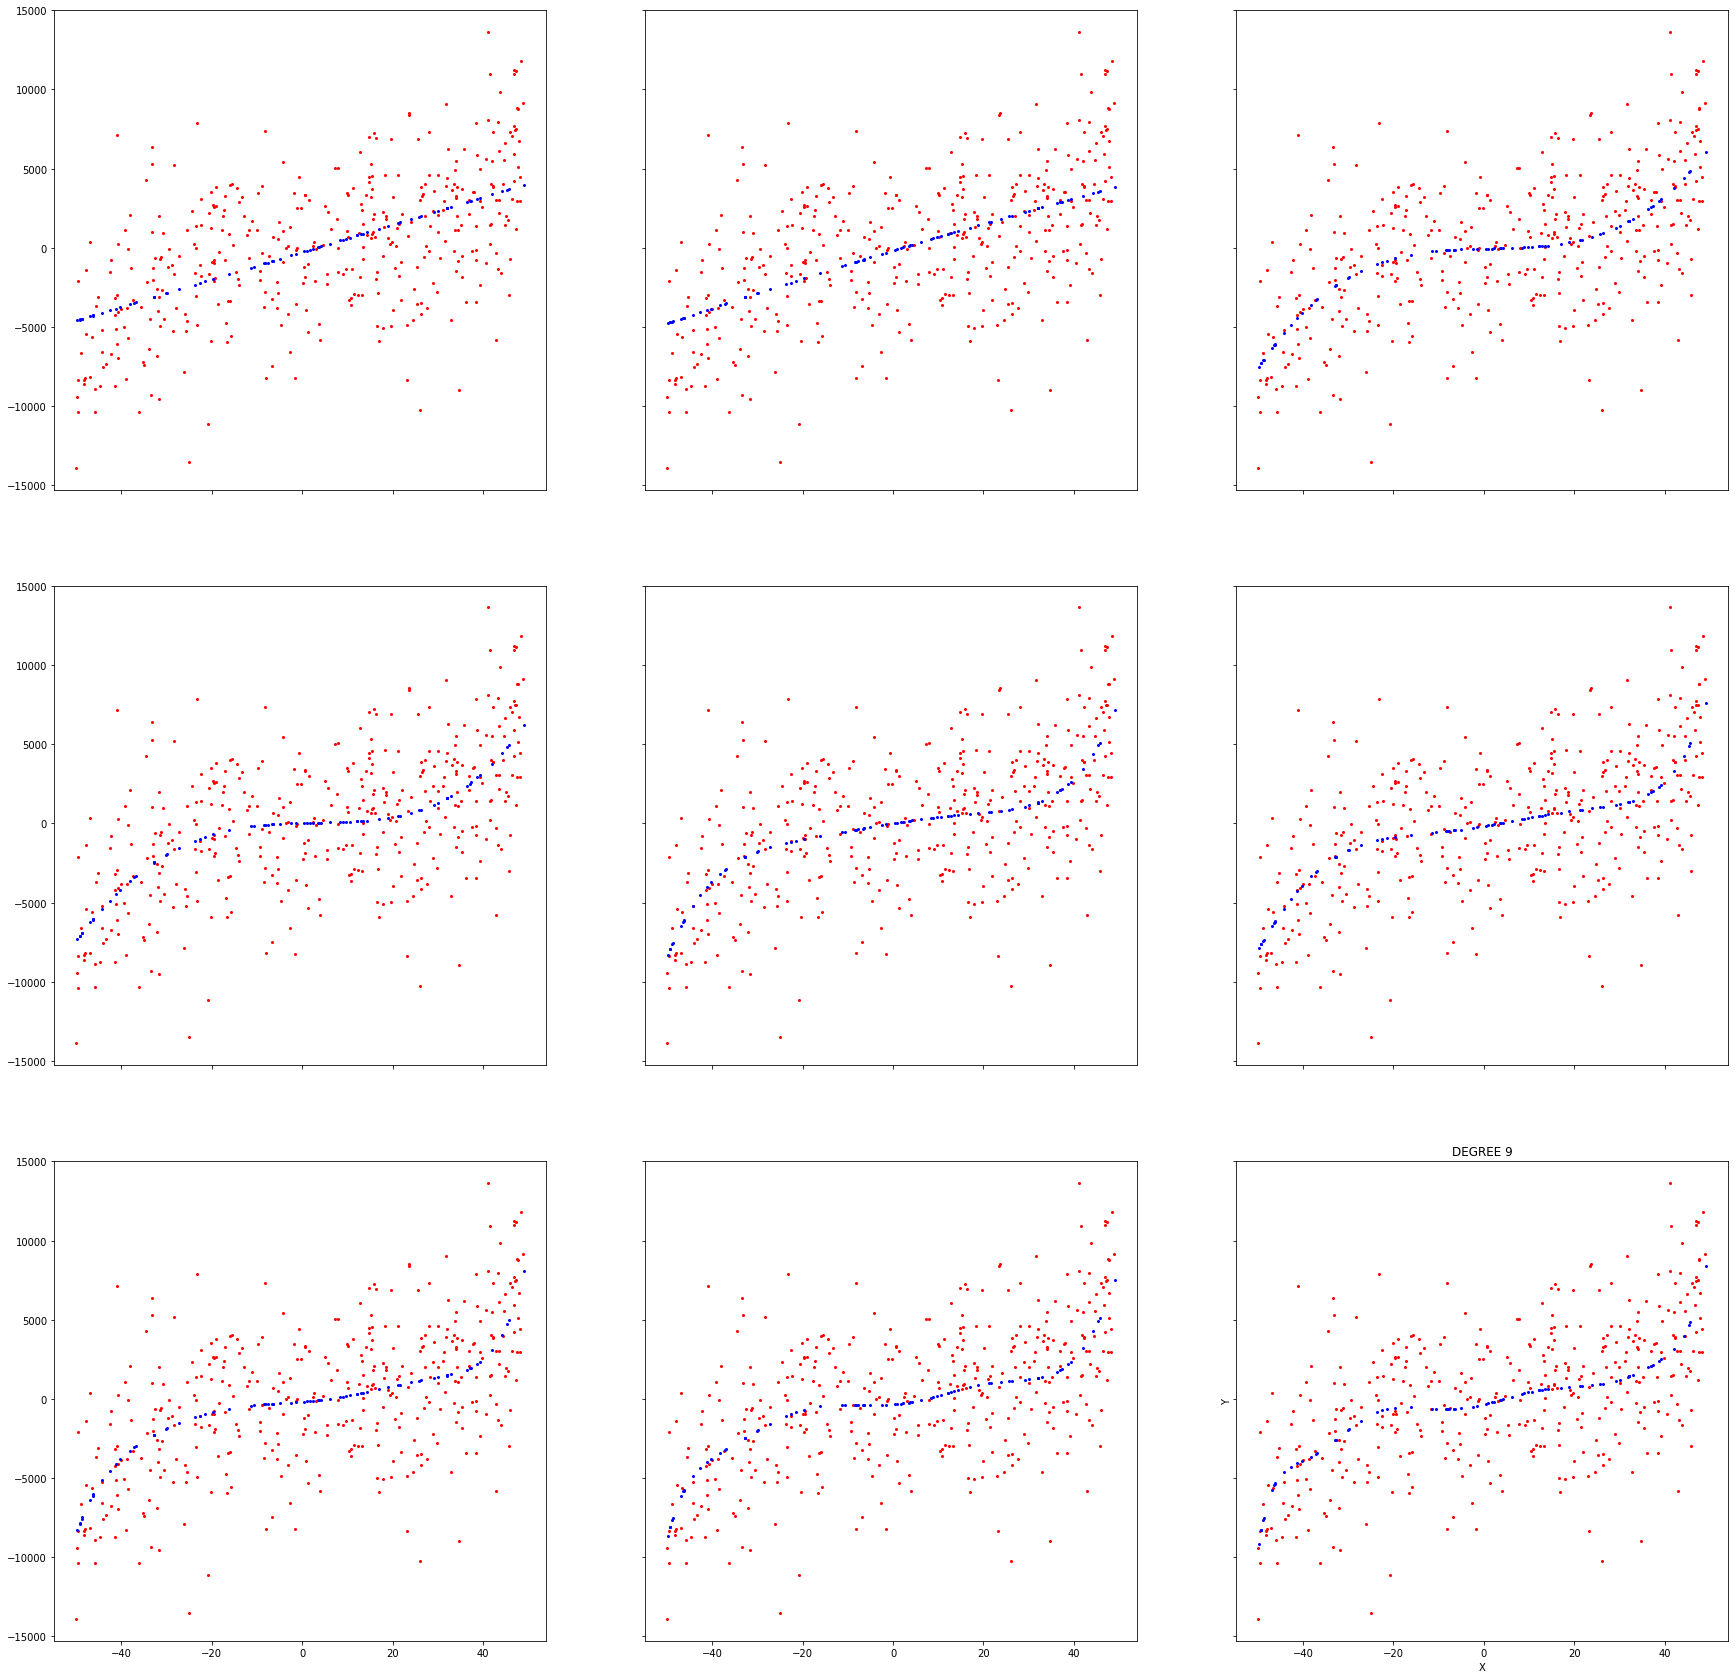

TRAINING SET  3


<Figure size 432x288 with 0 Axes>

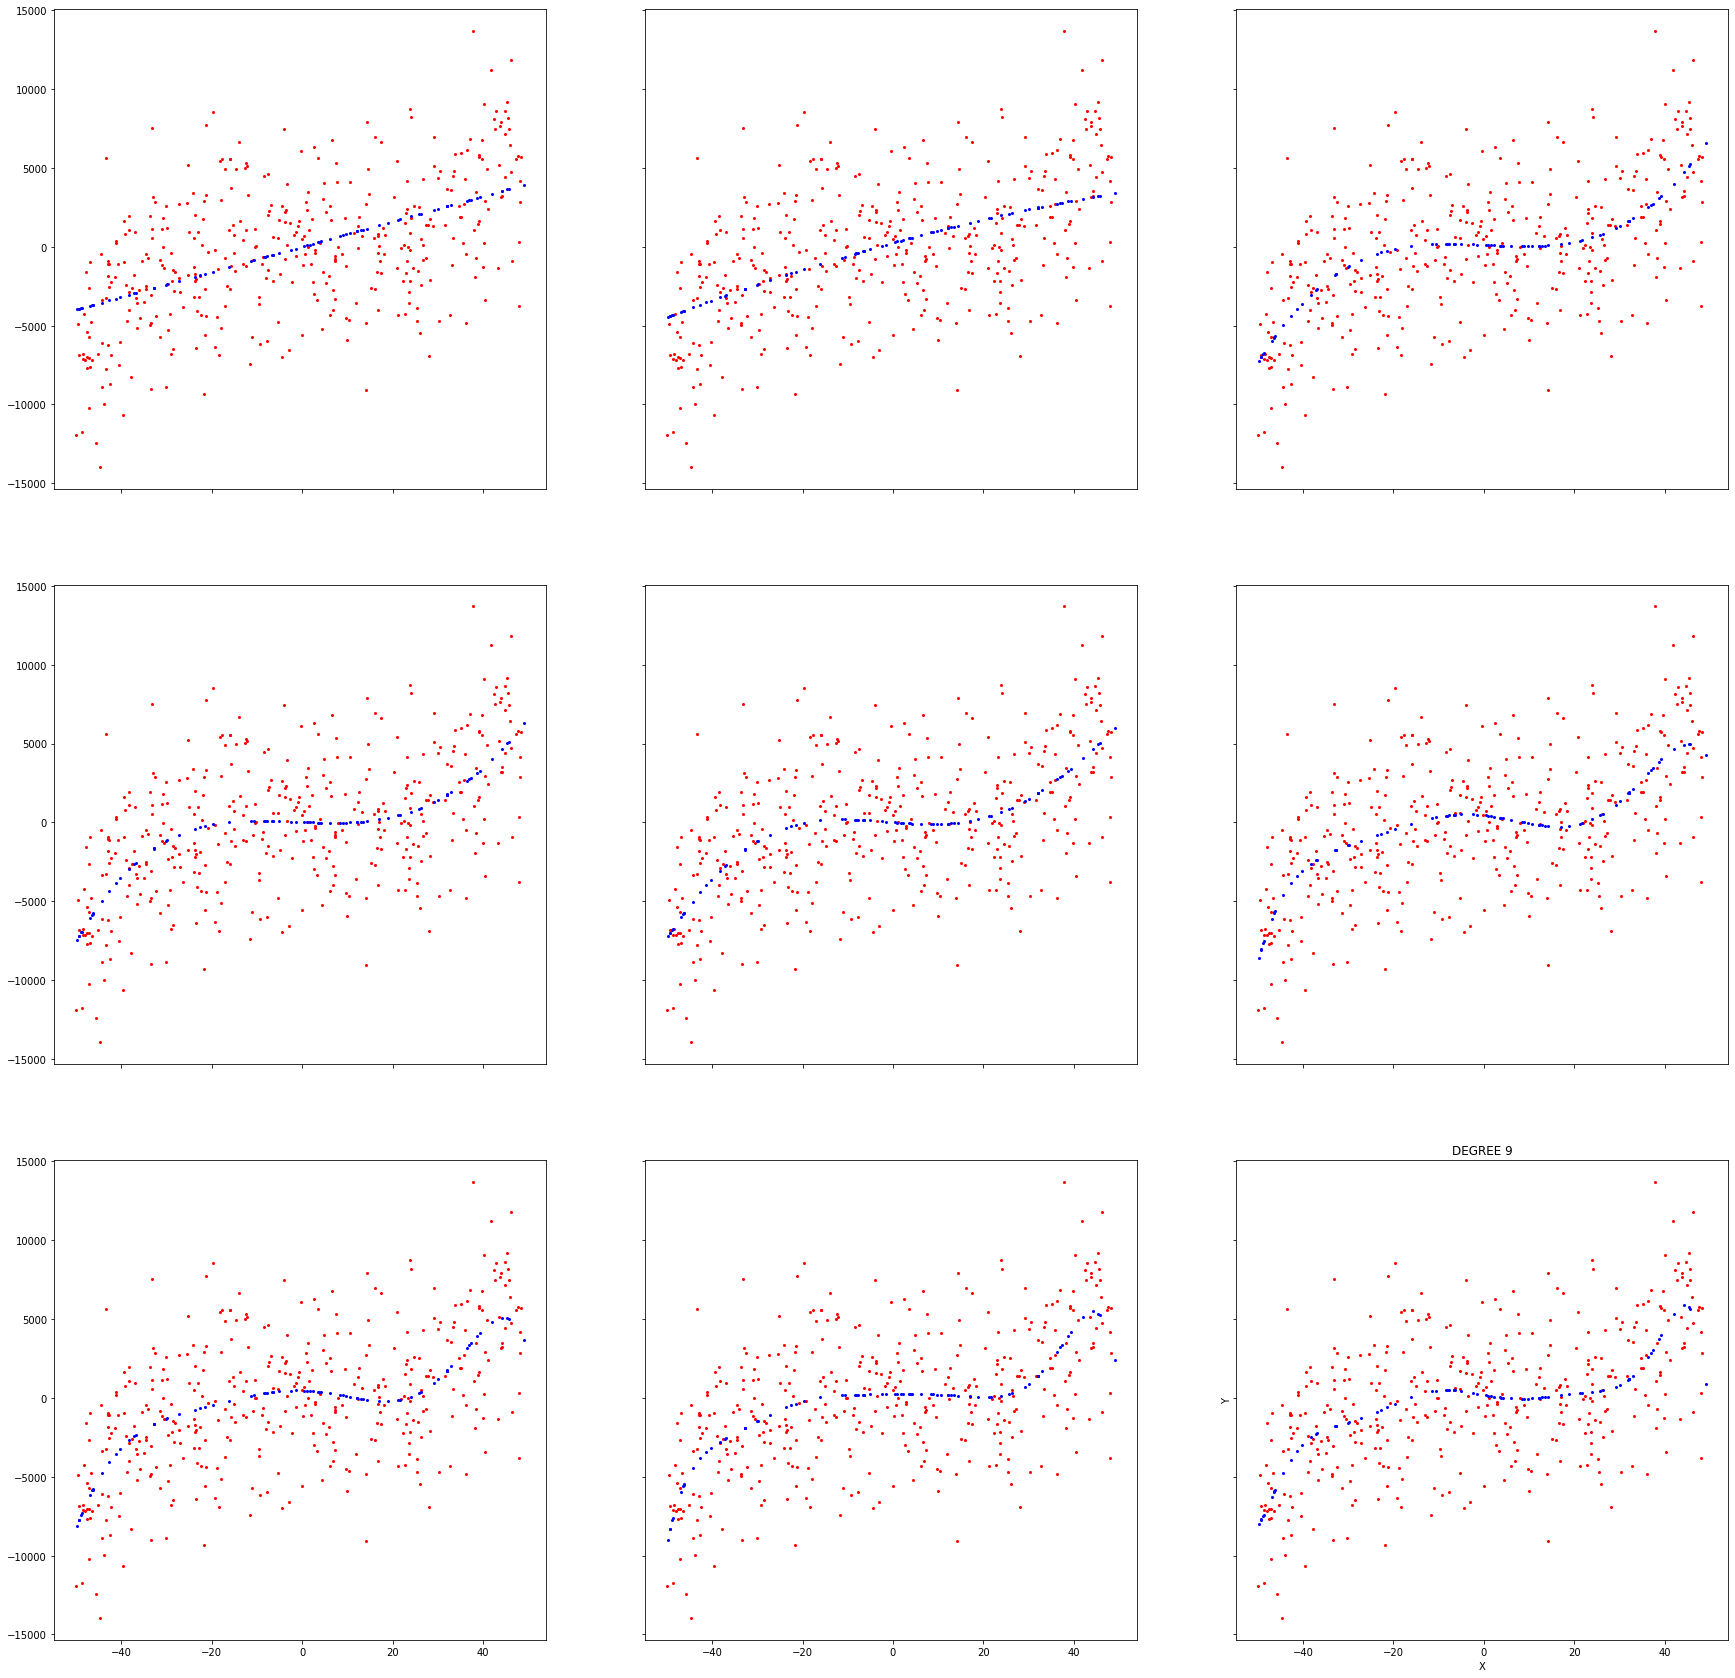

TRAINING SET  4


<Figure size 432x288 with 0 Axes>

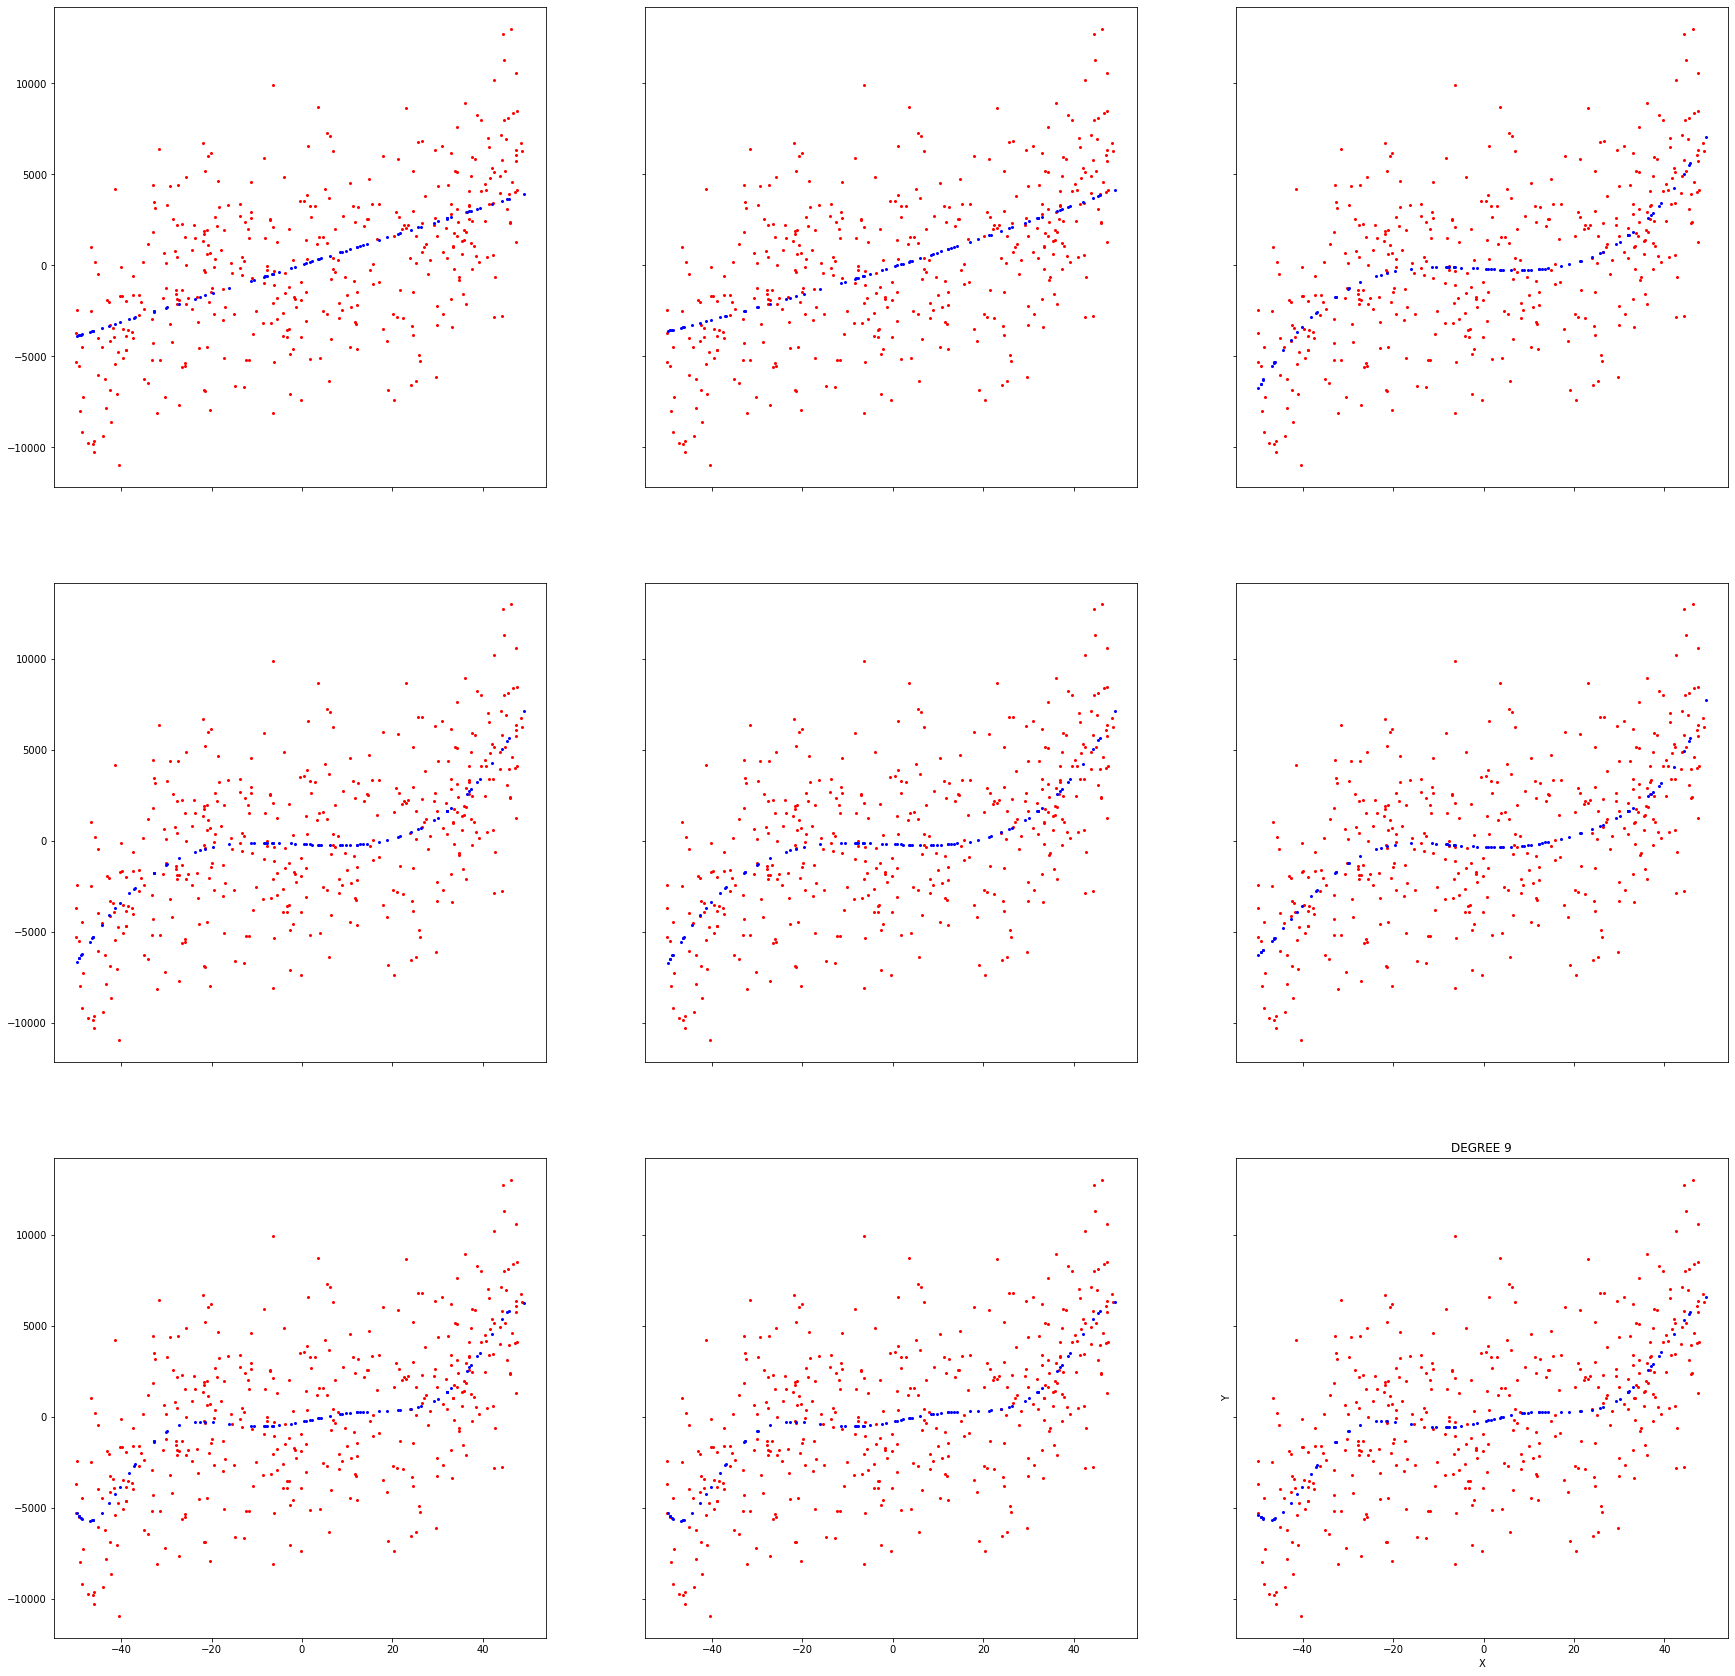

TRAINING SET  5


<Figure size 432x288 with 0 Axes>

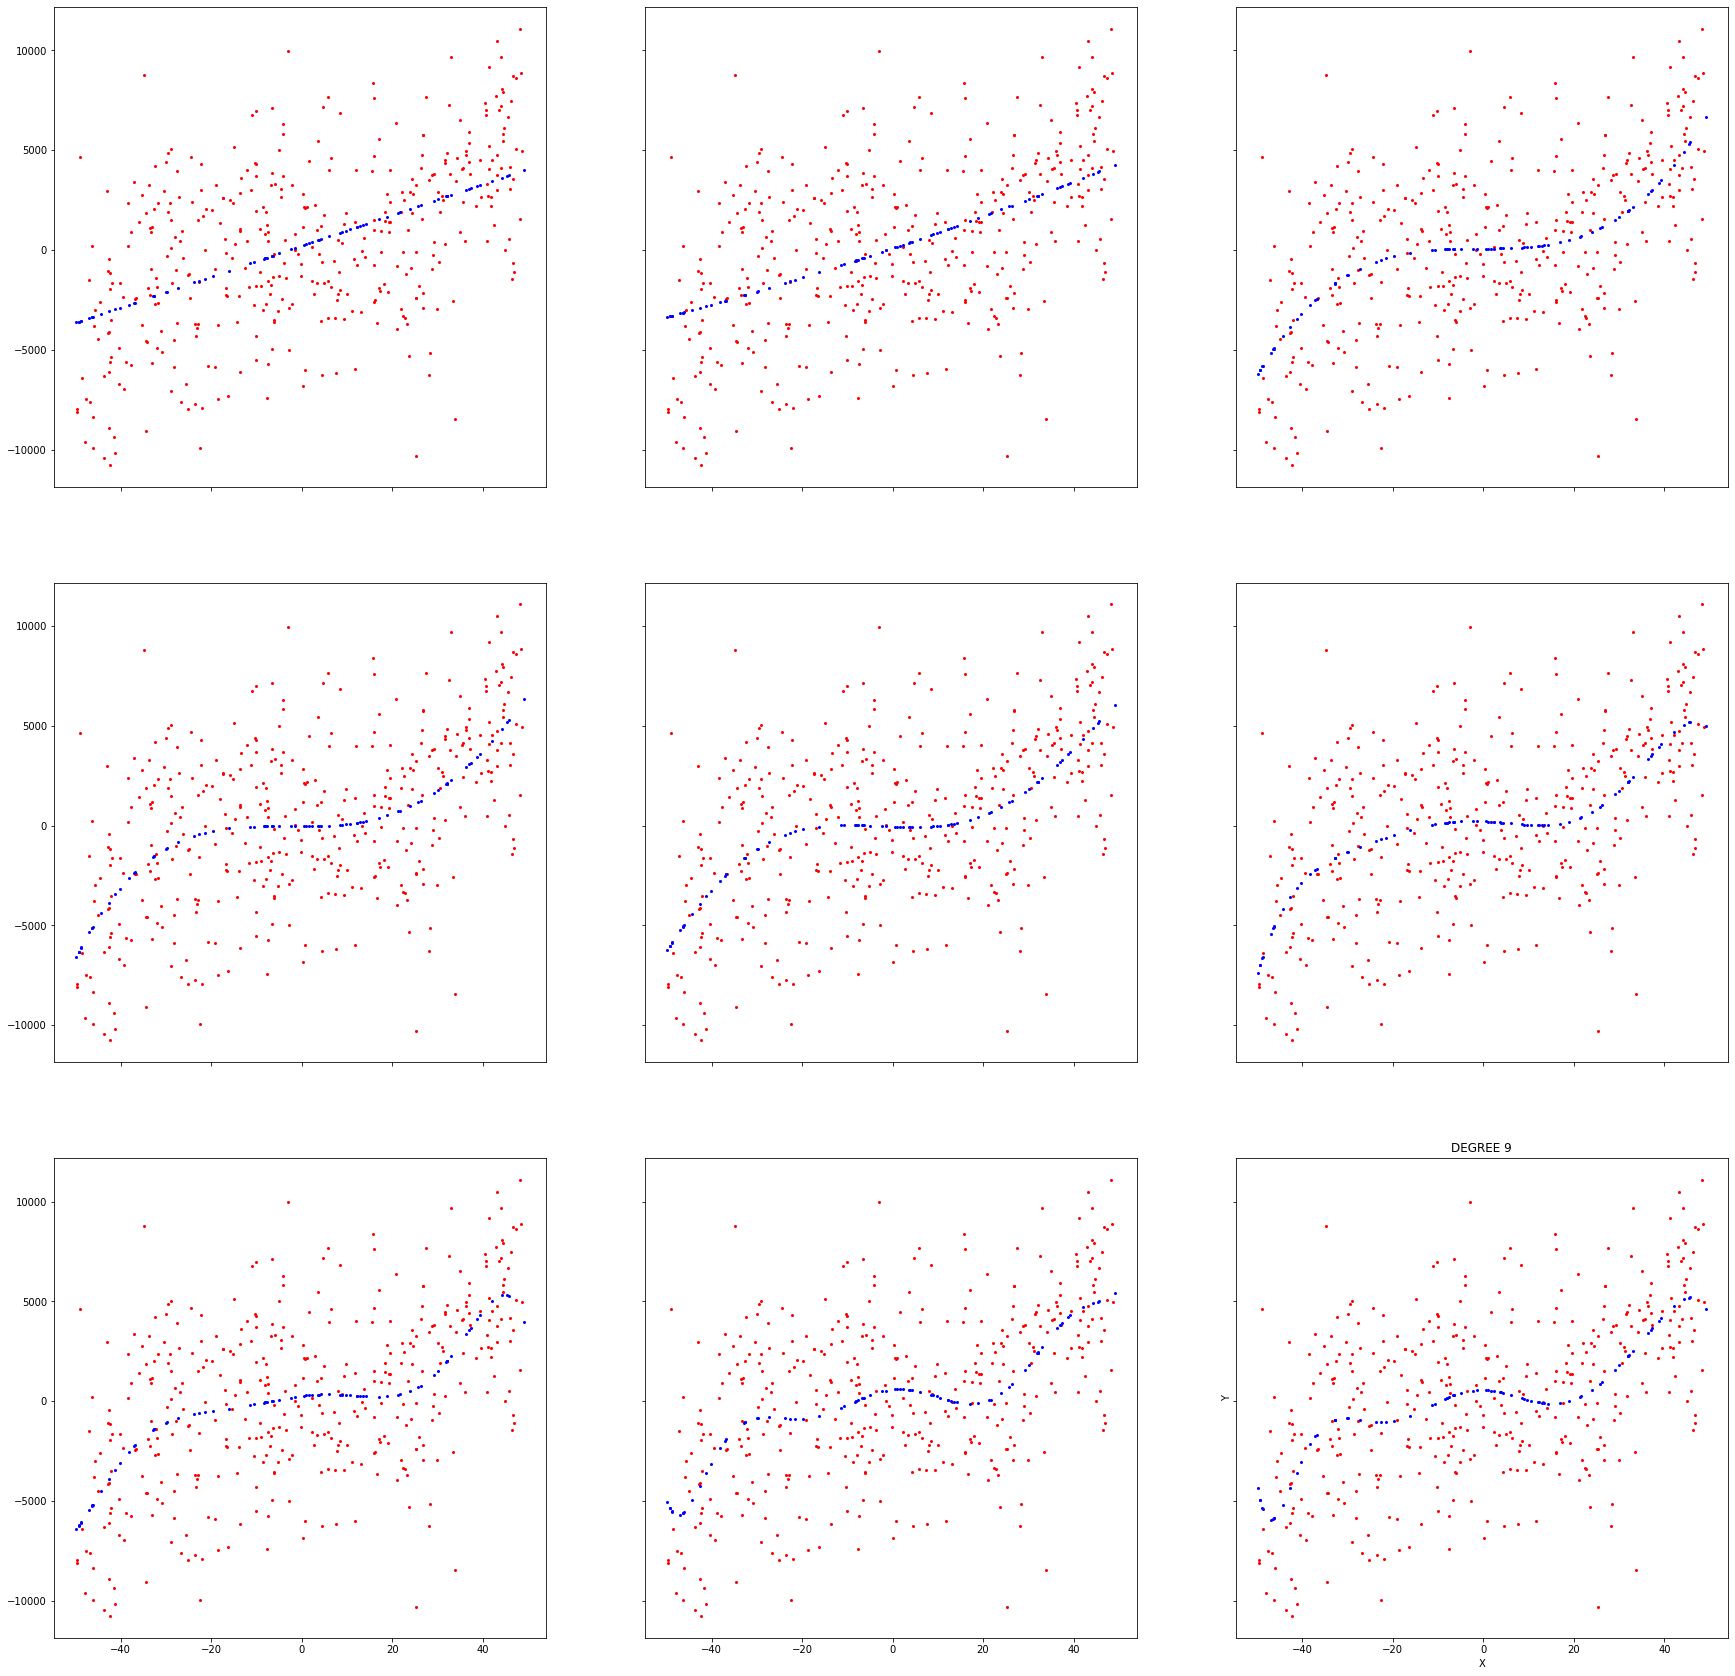

TRAINING SET  6


<Figure size 432x288 with 0 Axes>

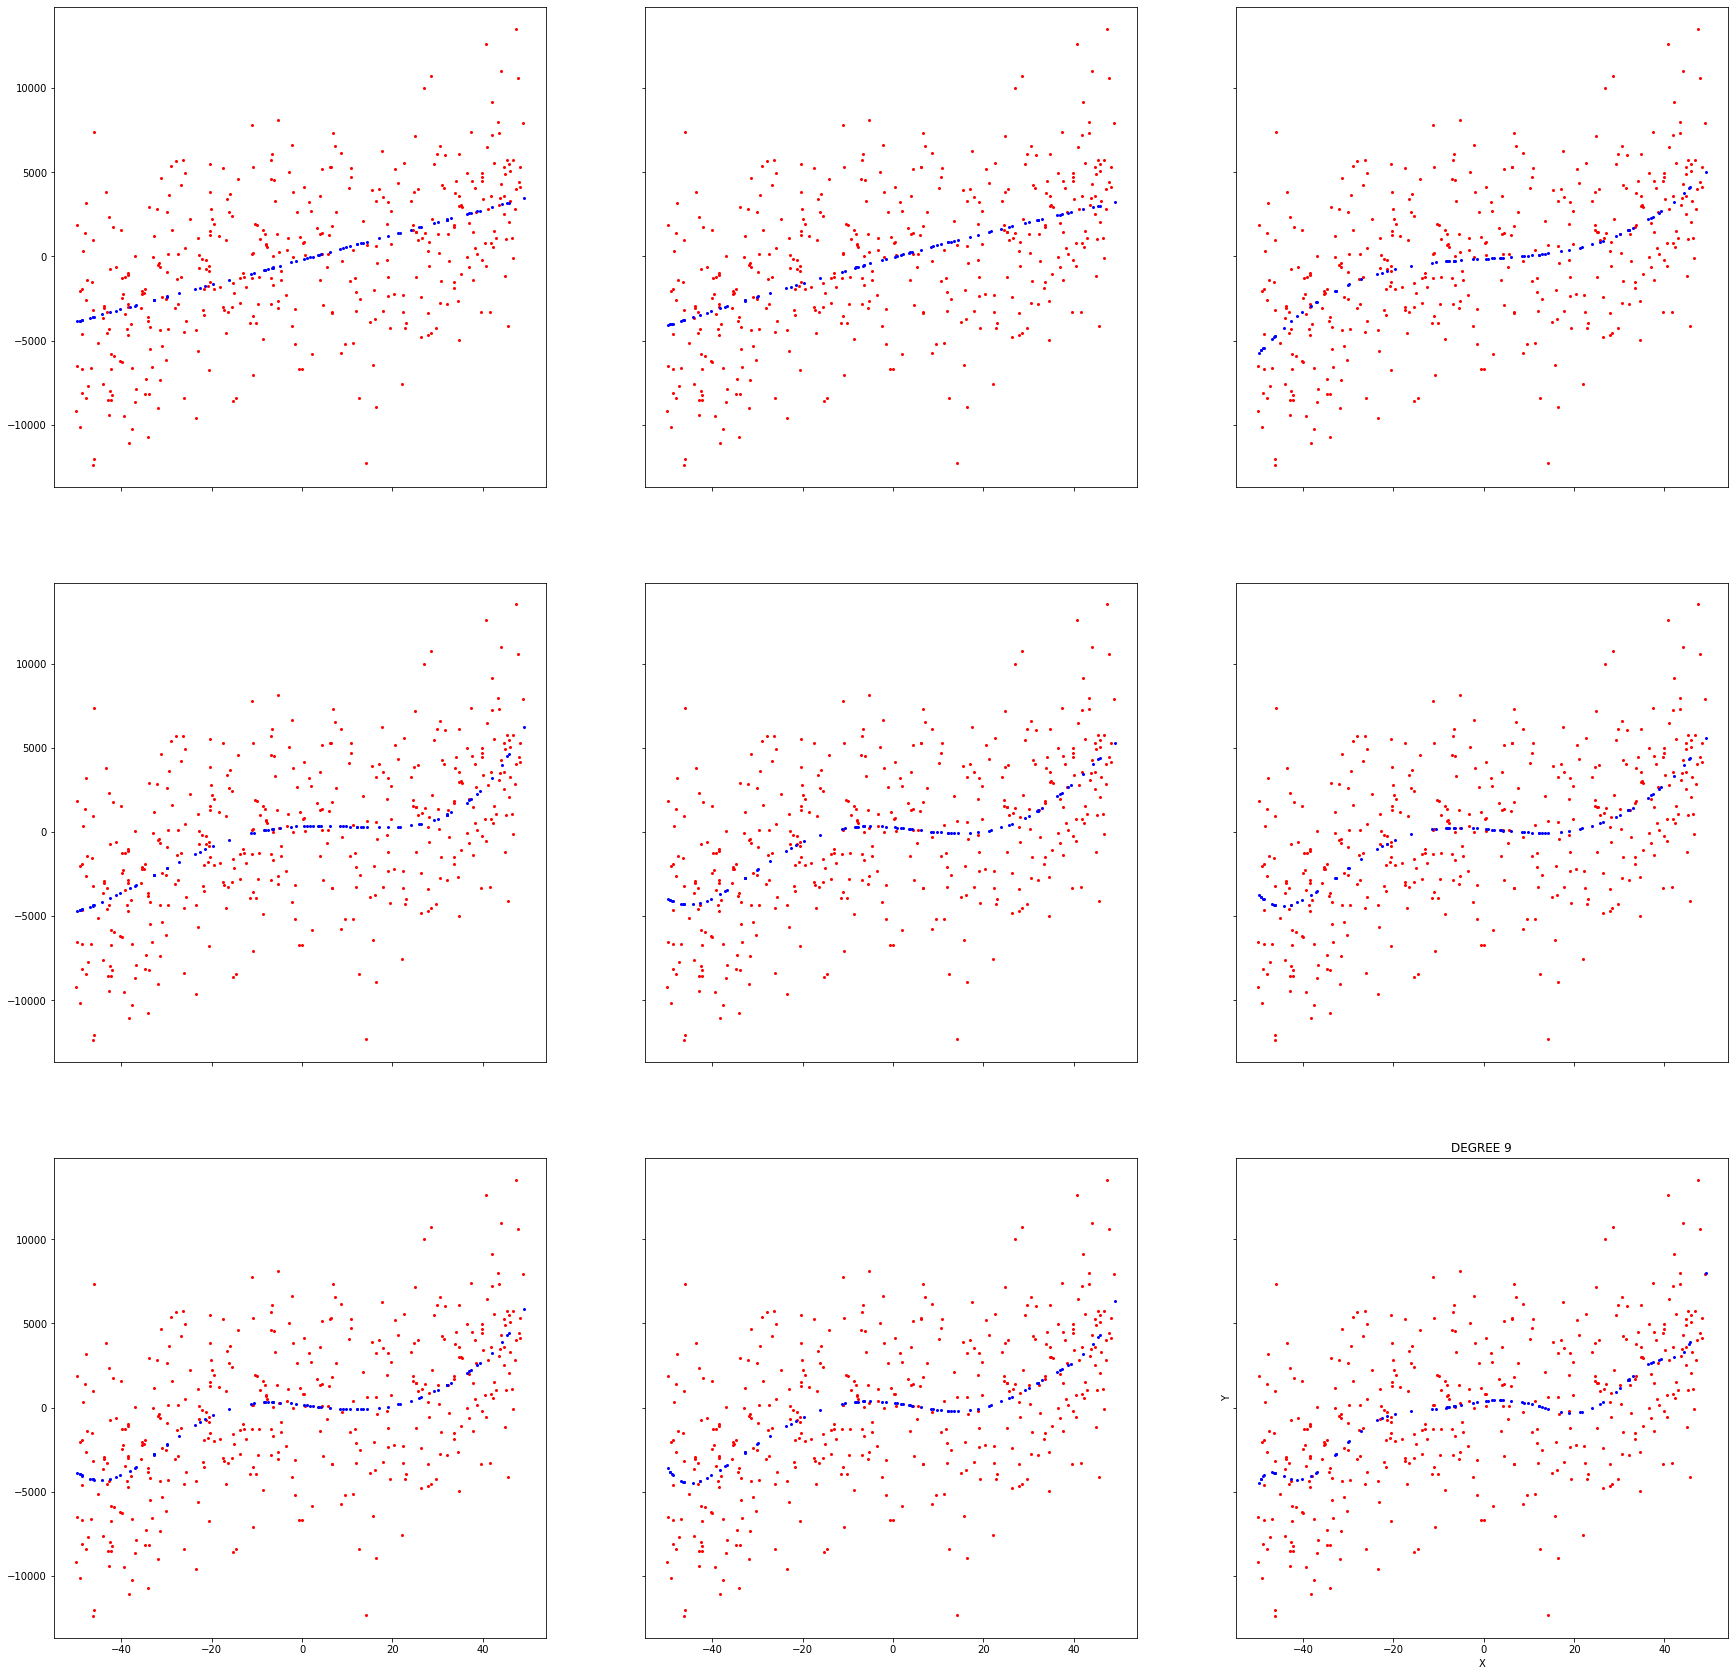

TRAINING SET  7


<Figure size 432x288 with 0 Axes>

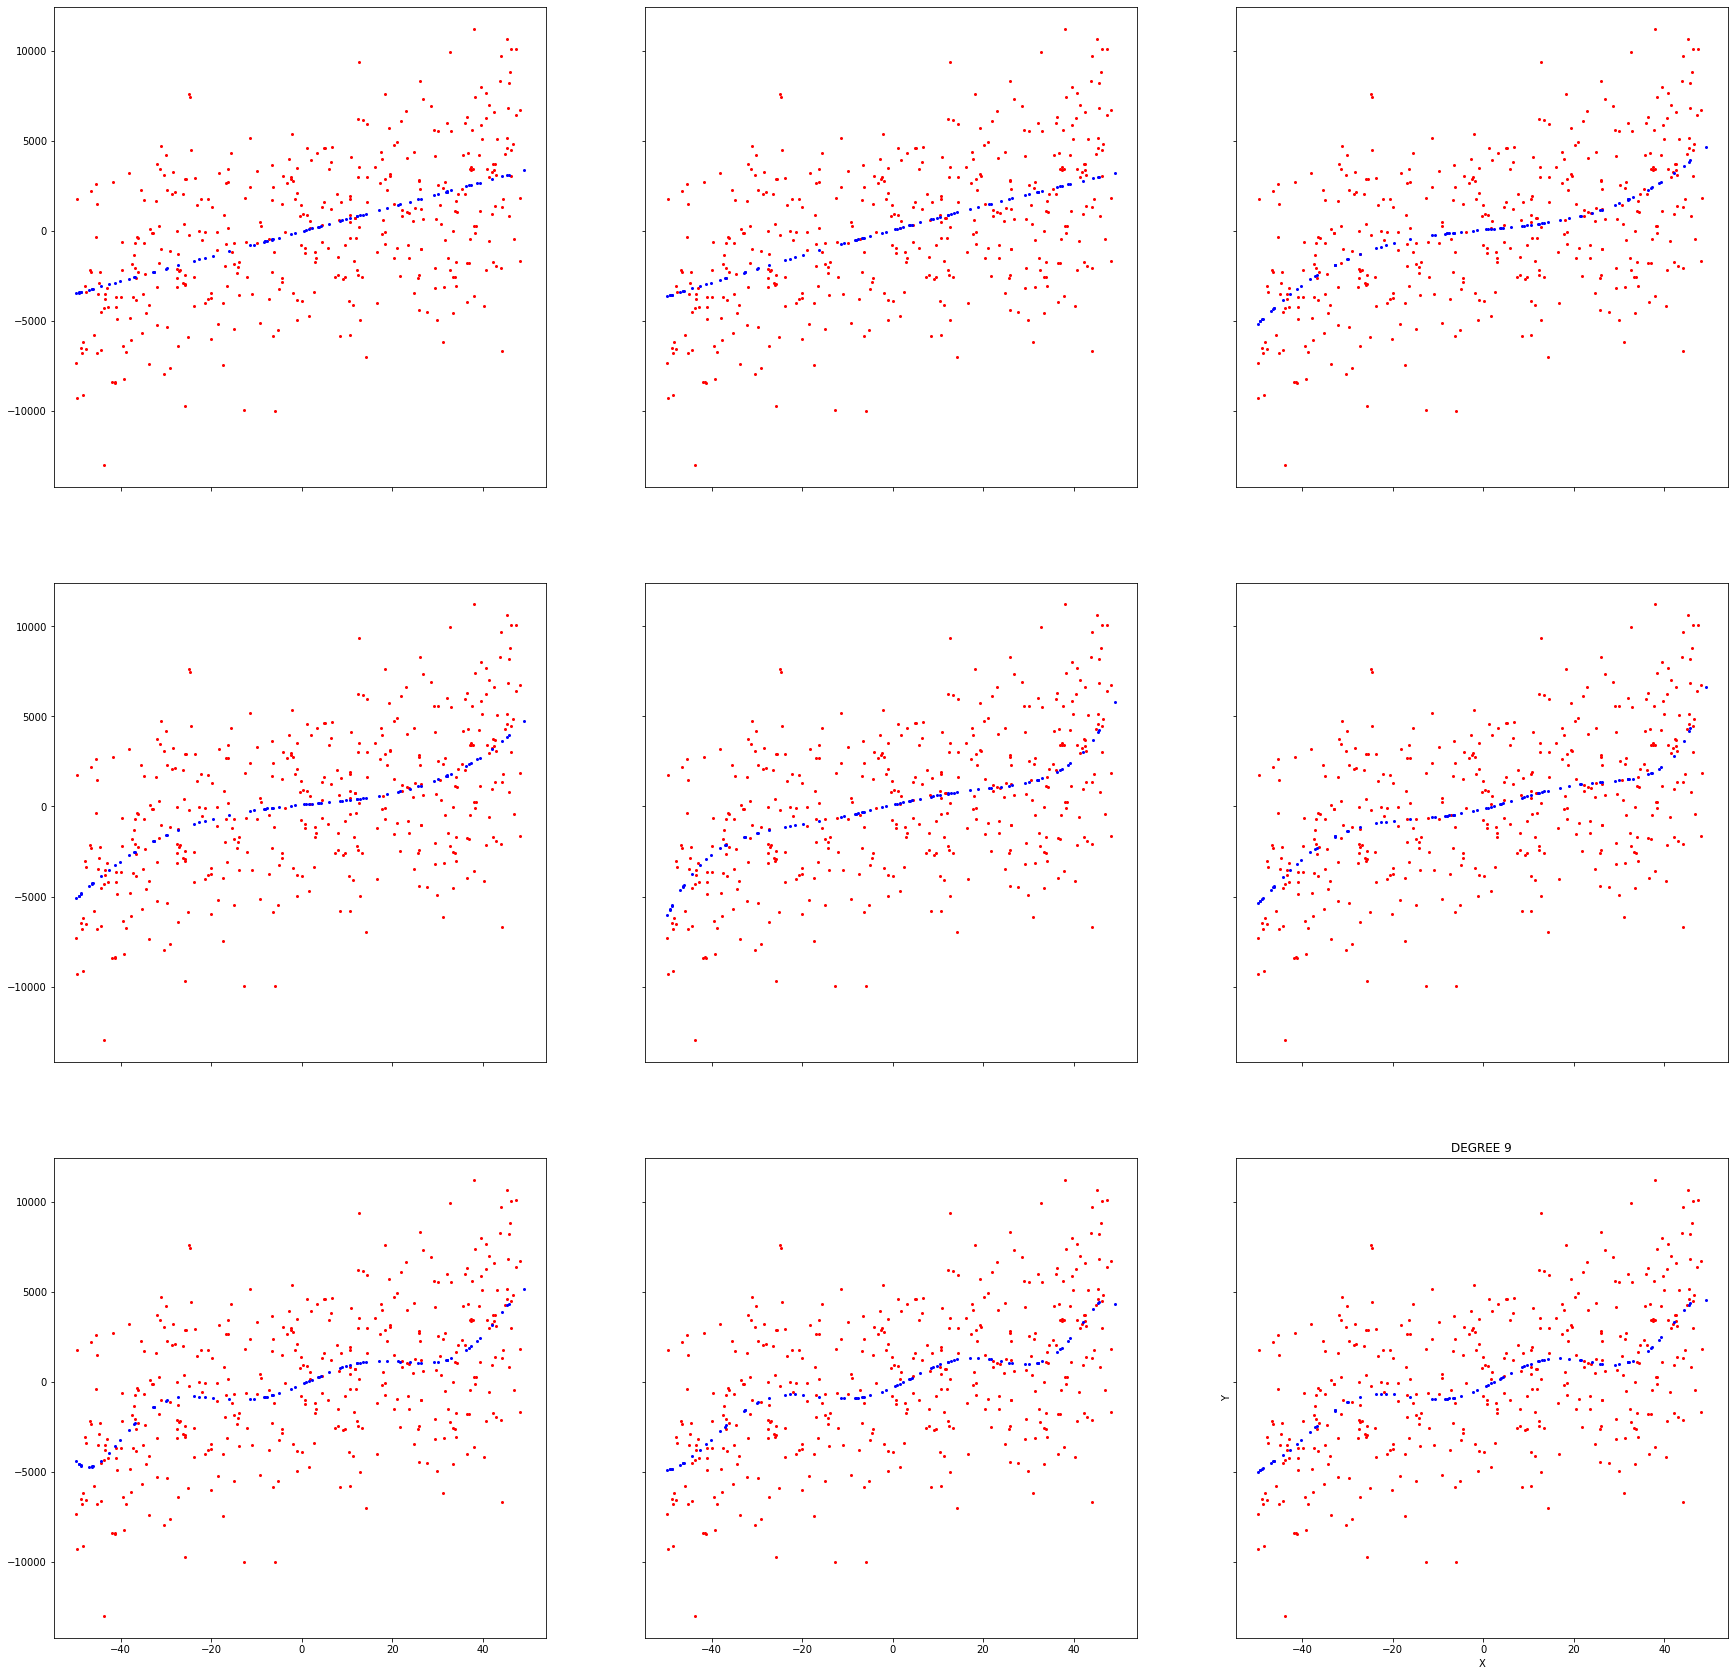

TRAINING SET  8


<Figure size 432x288 with 0 Axes>

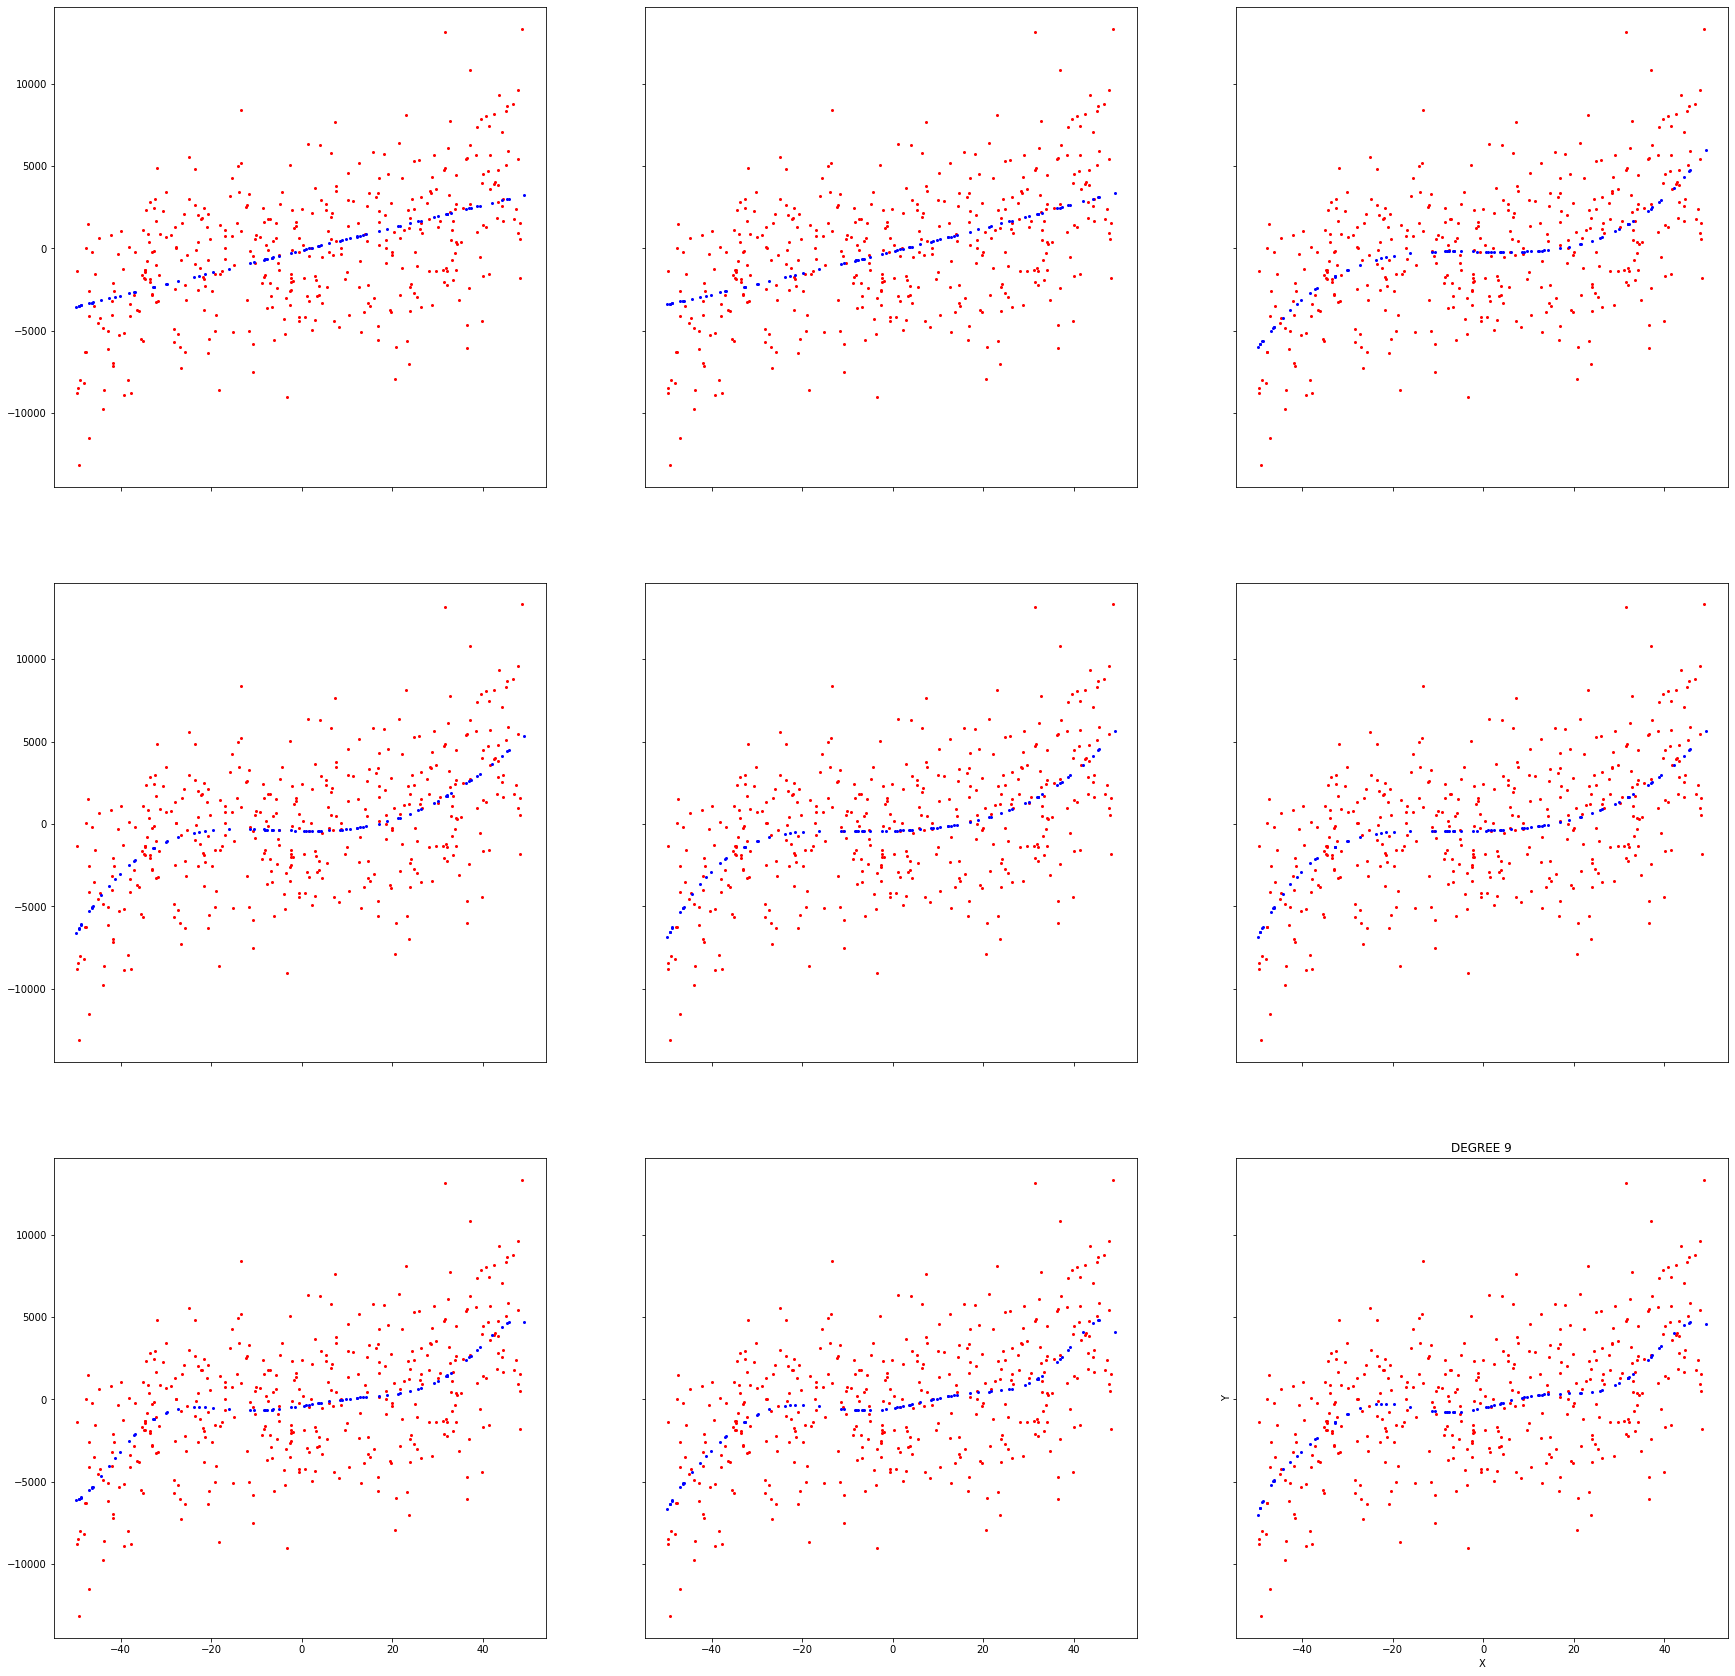

TRAINING SET  9


<Figure size 432x288 with 0 Axes>

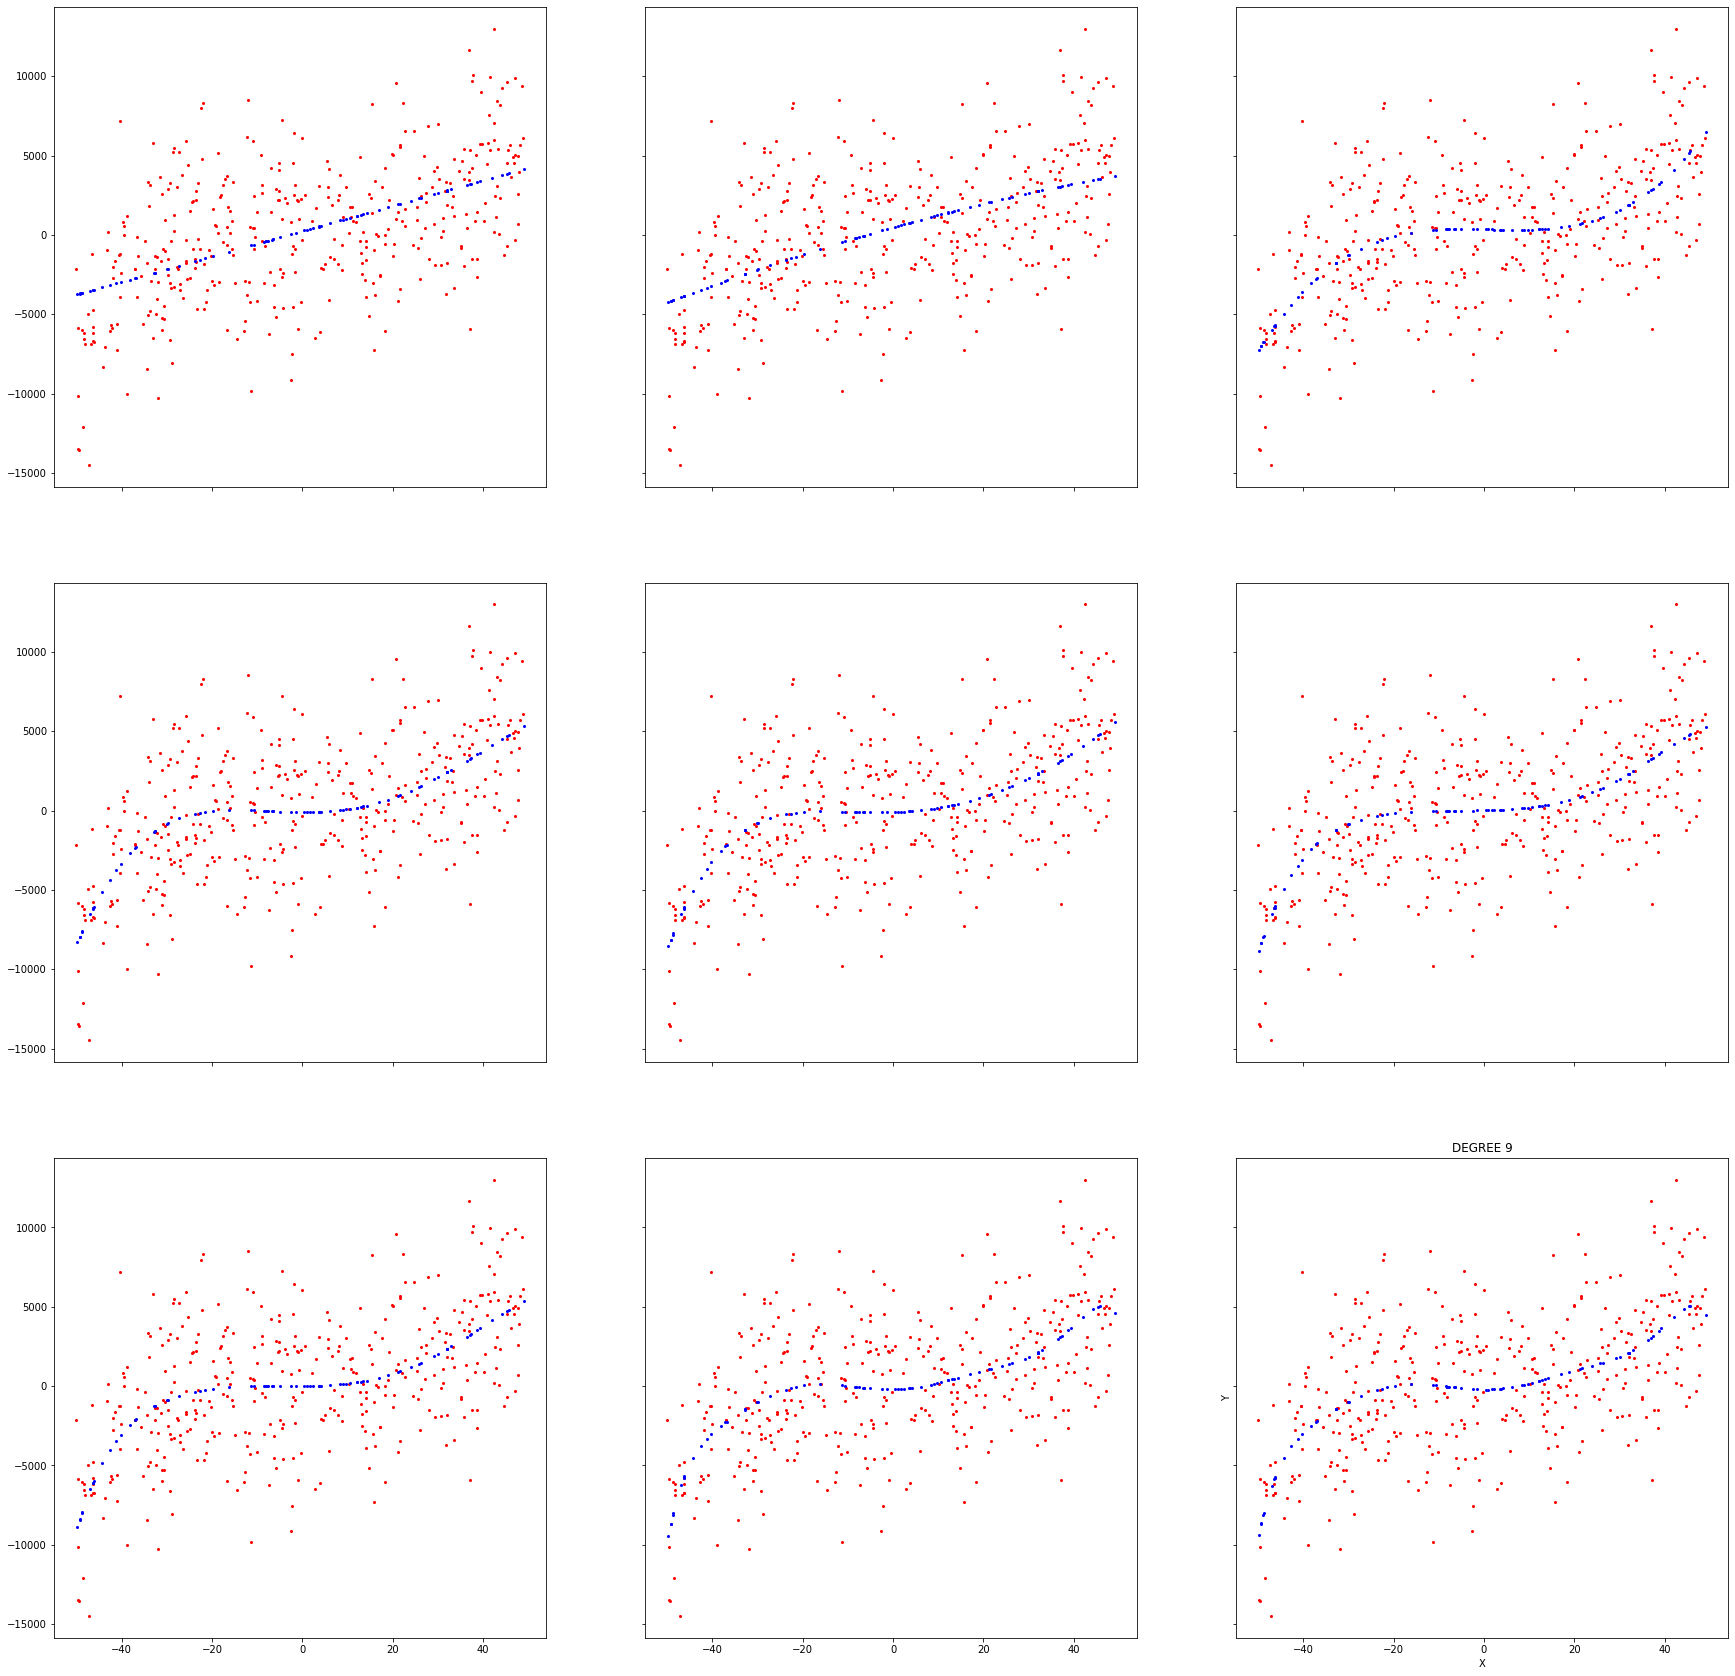

In [13]:
for i in range(10):
    print("TRAINING SET ", i)
    f = plt.figure()
    f, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(30, 30))
    x = X_train_data_sets[i][:, numpy.newaxis]  # transposing it
    y = Y_train_data_sets[i]
    for degree in range(0, 9):
        axes[int(degree/3)][int(degree % 3)].plot(x, y, 'r.', markersize=4)
        poly_features = PolynomialFeatures(degree=degree+1)
        X_train_poly = poly_features.fit_transform(x)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train_data_sets[i])
        y_test_predict = poly_model.predict(
            poly_features.fit_transform(xTest[:, numpy.newaxis]))
        axes[int(degree/3)][int(degree % 3)].plot(xTest[:, numpy.newaxis], y_test_predict, 'b.', markersize=4)
        plt.title("DEGREE "+str(degree+1))
        plt.xlabel("X")
        plt.ylabel("Y")
    plt.show()

# STEP 3: CALCULATE THE BIAS AND VARIANCE OF THE MODEL

## Get the list of all the predicted values

First we get the list of all the y predicted values for all the models and for all the degrees separately in a 2-D array.
Here, for each model of each degree, we get the predicted y values for the given test datasets.
The values are stored as follows: y[train_data_set_no][degree]

In [43]:
y_predicted = []
for i in range(20):
    x = X_train_data_sets[i][:, numpy.newaxis]  # transposing it
    y = Y_train_data_sets[i]
    temp = []
    for degree in range(0, 9):
        poly_features = PolynomialFeatures(degree=degree+1)
        X_train_poly = poly_features.fit_transform(x)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train_data_sets[i])
        y_test_predict = poly_model.predict(
            poly_features.fit_transform(xTest[:, numpy.newaxis]))
        temp.append(y_test_predict)
    y_predicted.append(temp)

## Function for calculating the bias and the variance

Then we calculate the bias and variance as follows:

- For a given degree we append the values of the y_predicted for each model to a list
- Convert this list to a numpy array y_predicted_part
- Calculate the bias of this list by subtracting the mean of the model from the testing dataset
- Bias corresponding to the models of a given degree is the mean of this list
- Similarly calculate the variance of this list
- Variance corresponding to the models of a given degree is the mean of this list

In [27]:
def find_bias_variance(order):
    y_predicted_part = []
    for i in range(20):
        y_predicted_part.append(y_predicted[i][order])
    y_predicted_part = numpy.asarray(y_predicted_part)
    bias = numpy.abs(numpy.mean(y_predicted_part, axis=0) - yTest)
    variance = numpy.var(y_predicted_part, axis=0)
    return(numpy.mean(bias), numpy.mean(variance))

Then we call the function as follows, in order to populate the lists, bias and variance.

In [28]:
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)

Bias: [819.8378604641326, 810.8402138398206, 67.63398967084957, 84.00189151242087, 79.18712744433826, 80.09962642308372, 84.97054138073908, 85.58629028495918, 88.73830344314263]
Variance: [70545.48914575046, 125870.85554877335, 150073.7395464768, 212235.70832526154, 276388.4802547406, 316863.49843748985, 357510.98475735466, 404286.670685786, 459132.37837248633]


The lists, bias and variance, now contain the bias and variance corresponding to a particular degree.

## Tabulate the values

We use the pandas library in order to display the required items in a table format

In [29]:
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(numpy.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(numpy.array(final_table["BIAS^2"])+numpy.array(variance))
df = pandas.DataFrame(final_table)
print(df)

   DEGREE        BIAS         BIAS^2       VARIANCE            MSE
0       1  819.837860  672134.117450   70545.489146  742679.606596
1       2  810.840214  657461.852380  125870.855549  783332.707929
2       3   67.633990    4574.356559  150073.739546  154648.096105
3       4   84.001892    7056.317778  212235.708325  219292.026103
4       5   79.187127    6270.601153  276388.480255  282659.081408
5       6   80.099626    6415.950153  316863.498437  323279.448591
6       7   84.970541    7219.992903  357510.984757  364730.977660
7       8   85.586290    7325.013085  404286.670686  411611.683771
8       9   88.738303    7874.486498  459132.378372  467006.864870


## Plot the bias-variance tradeoff

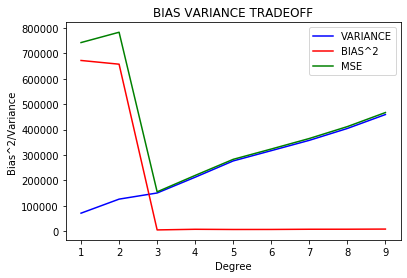

In [30]:
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()

# OBSERVATIONS AND INFERENCES

From the bias variance tradeoff graph it is obvious that,

- as the degree of the polynomial regression that we try to fit the data with increases, the bias value decreases. This is because of overfitting; that is the model now trained, has a lot of additional features and hence is able to fit in more dataset points, leading to less bias.
- as the degree of the polynomial regression that we try to fit the data with increases, the variance value increases. This is because of overfitting; now, the model tries to predict the noise component of the dataset too, hence leading to higher values of variance

From the above plot, the given dataset is more likely to be of the degree 4, because of the following reasons:

- from the bias-variance tradeoff graph, we see that the total error(MSE) keeps on decreasing till 3, after which it increases.
- The models with complexity above 3 degrees have high variance and low bias, and hence are overfit.
- The models with complexity below 3 degrees have low variance but high bias, and hence are underfit.
- since the dataset used is really noisy, the bias is lost really quickly with higher models.

# FITTING THE TRAINED MODEL TO THE TESTING DATASET FOR DISPLAYING THE LINE OF BEST FIT

<Figure size 432x288 with 0 Axes>

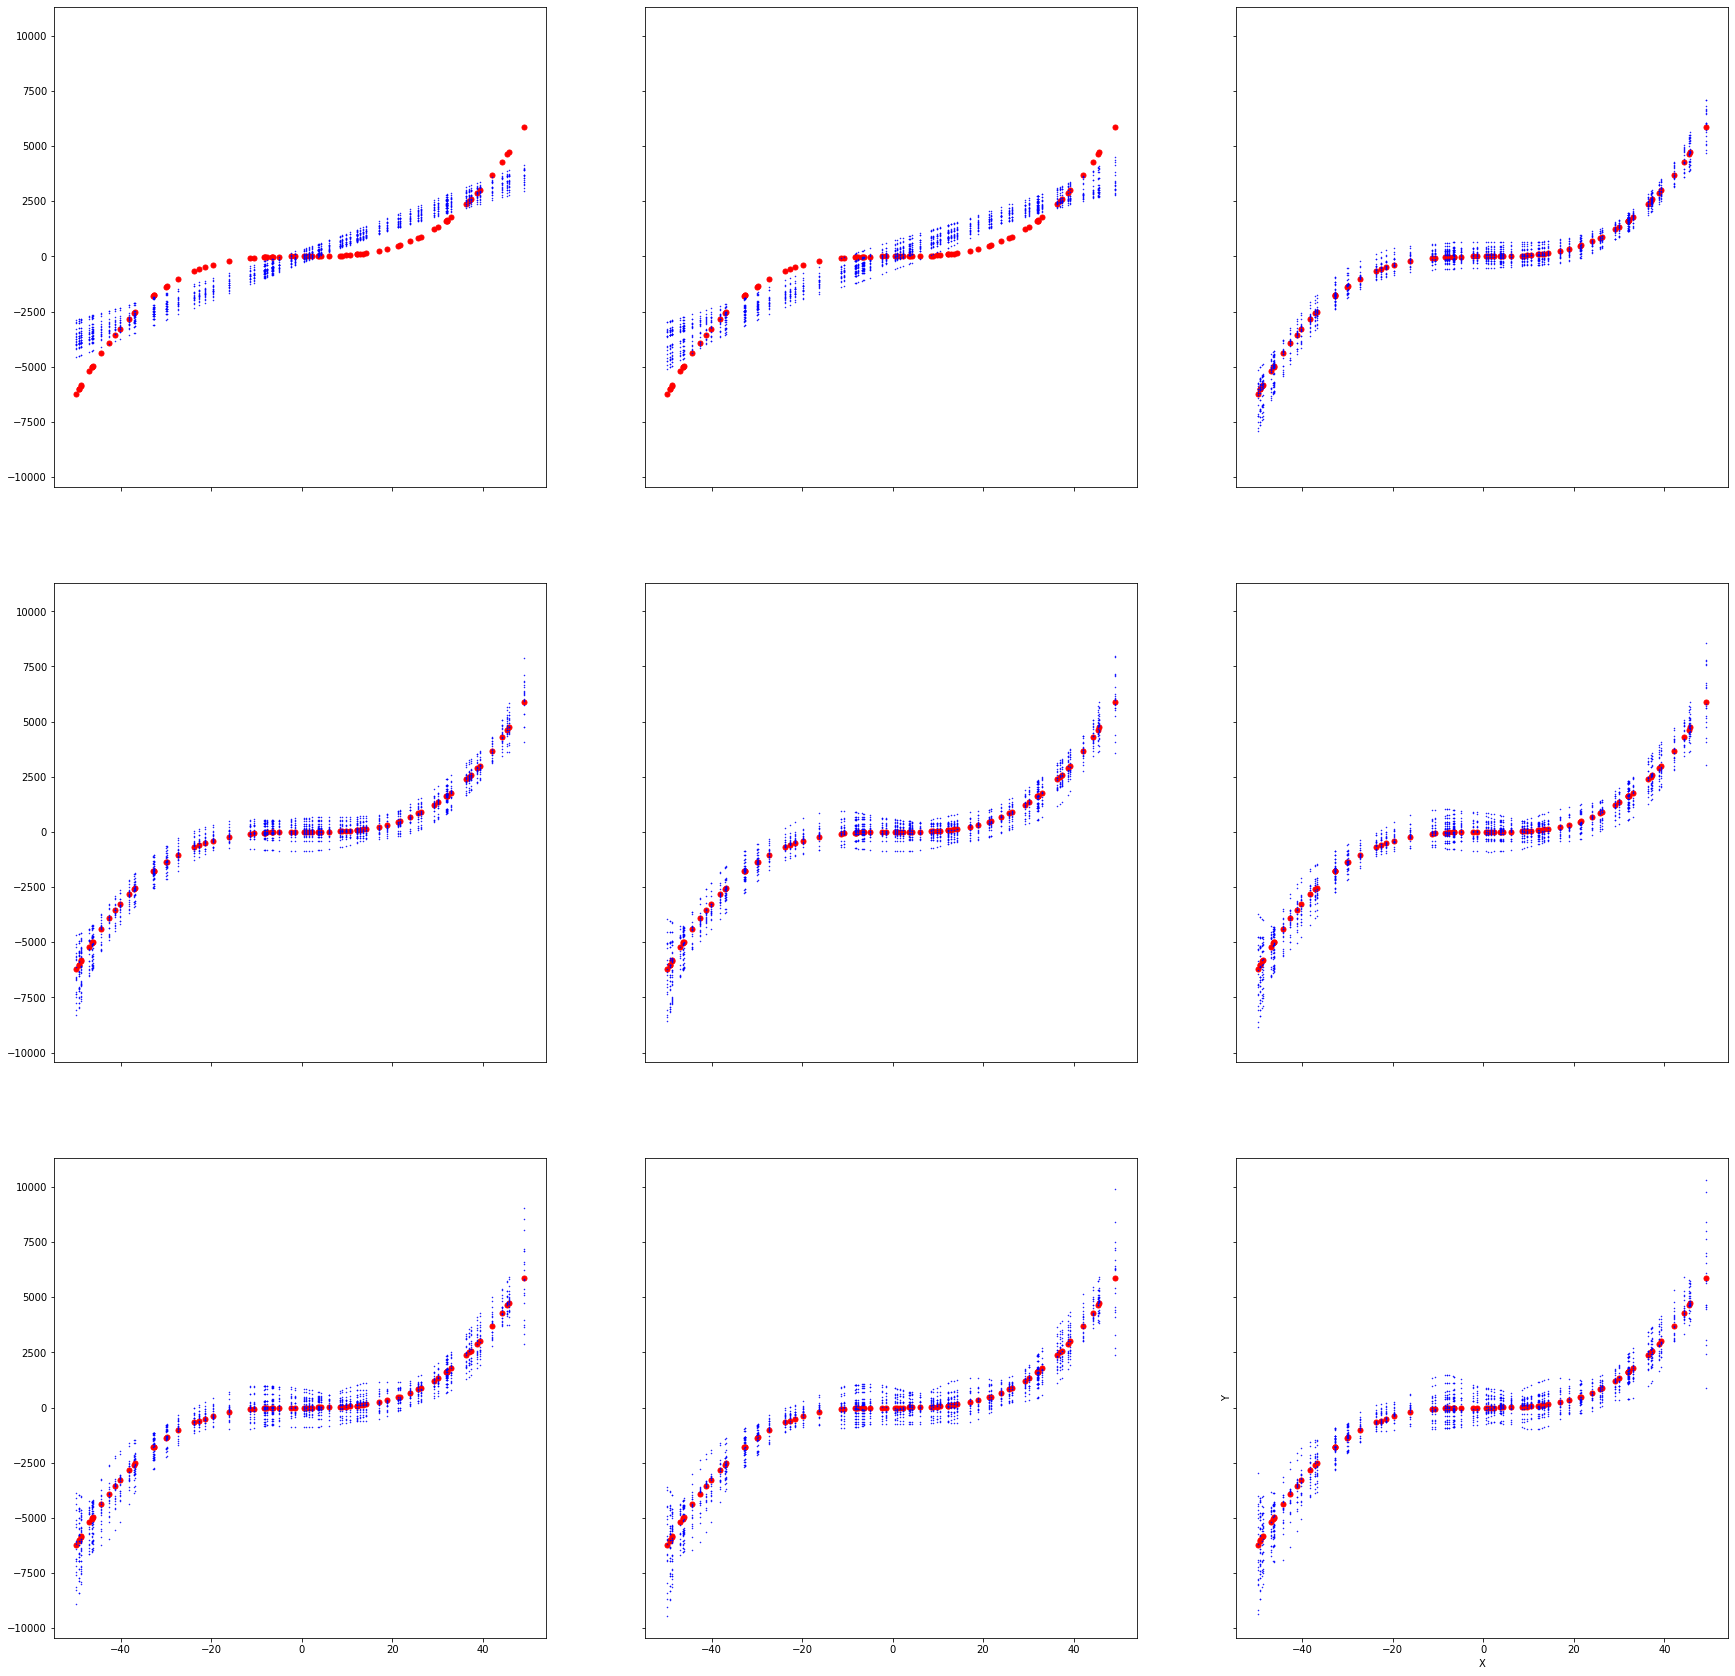

In [34]:
f = plt.figure()
f, axes = plt.subplots(nrows = 3, ncols = 3, sharex=True, sharey = True,figsize=(30,30))
for degree in range(9):
    xtemp=numpy.concatenate([xTest for i in range(20)])
    y_predicted_part=[]
    for i in range(20):
        y_predicted_part.append(y_predicted[i][degree])
    ytemp=numpy.array(y_predicted_part).reshape(-1)
    axes[int((degree)/3)][int((degree)%3)].plot(xTest, yTest, 'r.',markersize=10)
    axes[int((degree)/3)][int((degree)%3)].plot(xtemp, ytemp,'b.',markersize=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Here the red line represents the actual testing data, while the blue line shows the model we have made

# IF THE BIAS IS CALCULATED AS THE RMS OF THE DIFFERENCE BETWEEN THE ACTUAL AND THE PREDICTED y VALUES

For the explanation, refer the step 2. Also as it was mentioned in the news forum, this has been done. (no report has been done on this)

In [35]:
def find_bias_variance(order):
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][order])
    y_predicted_part = numpy.asarray(y_predicted_part)
    bias2 = numpy.abs((numpy.mean(y_predicted_part, axis=0) - yTest)**2)
    variance = numpy.var(y_predicted_part, axis=0)
    return(numpy.mean(bias2), numpy.mean(variance))

In [36]:
bias2 = []
variance = []
bias=[]
for i in range(9):
    b, v = find_bias_variance(i)
    bias2.append(b)
    bias.append(b**0.5)
    variance.append(v)
print("Bias^2:", bias2)
print("Bias:",bias)
print("Variance:", variance)

Bias^2: [994102.0502429877, 947652.6623360568, 13346.897596484278, 16577.685944286524, 14789.197991800145, 21654.171293720145, 24887.132629270855, 26132.988026277464, 26069.77298432051]
Bias: [997.0466640248027, 973.4745309128826, 115.52877388981621, 128.754362816514, 121.61084652201113, 147.15356364600942, 157.7565612875447, 161.657007352844, 161.46136684767816]
Variance: [74599.47845405174, 100503.1208372216, 148983.89625960536, 201219.3116763339, 266225.94696614216, 319399.10340579244, 348141.12904503016, 407651.1049847179, 461857.41438096884]


In [37]:
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(numpy.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(numpy.array(final_table["BIAS^2"])+numpy.array(variance))
df = pandas.DataFrame(final_table)
print(df)

   DEGREE        BIAS         BIAS^2       VARIANCE           MSE
0       1  997.046664  994102.050243   74599.478454  1.068702e+06
1       2  973.474531  947652.662336  100503.120837  1.048156e+06
2       3  115.528774   13346.897596  148983.896260  1.623308e+05
3       4  128.754363   16577.685944  201219.311676  2.177970e+05
4       5  121.610847   14789.197992  266225.946966  2.810151e+05
5       6  147.153564   21654.171294  319399.103406  3.410533e+05
6       7  157.756561   24887.132629  348141.129045  3.730283e+05
7       8  161.657007   26132.988026  407651.104985  4.337841e+05
8       9  161.461367   26069.772984  461857.414381  4.879272e+05


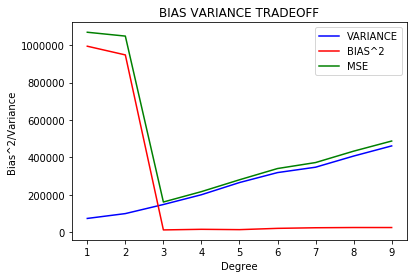

In [38]:
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()